Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
### Input date for analysis
anltdate="2020-11-20"
configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+------------------

In [2]:
#sc.stop()
#exit()

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [3]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
#anltdate="2020-11-19"
#configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [4]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [5]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2020-11-20  Afghanistan_nan         0         377.0         825.0   
1  2020-11-20      Albania_nan         0         786.0        2191.0   
2  2020-11-20      Algeria_nan         0        1023.0        3063.0   
3  2020-11-20      Andorra_nan         0          48.0         152.0   
4  2020-11-20       Angola_nan         0         212.0         519.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0        1433.0              44228.0               44320.0  35530000.0   
1        4412.0              30623.0               31112.0   2878445.0   
2        6544.0              71652.0               72498.0  41320000.0   
3         450.0               6066.0                6139.0     77239.0   
4        1081.0              14134.0               14248.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001245   
1                                       0.010639   
2                                       0.001734   
3                                       0.078547   
4                                       0.000430   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.012448                     92.0   
1                                           0.106391                    489.0   
2                                           0.017341                    846.0   
3                                           0.785474                     73.0   
4                                           0.004301                    114.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    2.589361             204.714279   
1                  169.883392             630.285706   
2                   20.474346             934.857117   
3                  945.118408              64.285713   
4                    3.468601             154.428574   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           8.066422      
1                                         306.554413      
2                                          31.674734      
3                                        1165.214478      
4                                           6.578172

In [6]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} 
    order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +80 cases a day AVG last 7days 

In [7]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-20' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-11-20           United States_nan          165029.281250   
1   2020-11-20                   Italy_nan           34589.570312   
2   2020-11-20                  Brazil_nan           28597.857422   
3   2020-11-20                  France_nan           26657.572266   
4   2020-11-20          United Kingdom_nan           23294.427734   
5   2020-11-20                  Poland_nan           22186.000000   
6   2020-11-20                  Russia_nan           22184.000000   
7   2020-11-20                 Germany_nan           18384.714844   
8   2020-11-20                   Spain_nan           14907.713867   
9   2020-11-20                    Iran_nan           12647.428711   
10  2020-11-20                 Ukraine_nan           12056.713867   
11  2020-11-20               Argentina_nan            9273.571289   
12  2020-11-20                 Romania_nan            8516.428711   
13  2020-11-20                Colombia_nan            7354.000000   
14  2020-11-20                 Austria_nan            6720.143066   
15  2020-11-20                Portugal_nan            6428.285645   
16  2020-11-20                  Jordan_nan            5329.856934   
17  2020-11-20             Netherlands_nan            5257.714355   
18  2020-11-20             Switzerland_nan            5037.000000   
19  2020-11-20                 Czechia_nan            5011.428711   
20  2020-11-20                 Morocco_nan            4961.856934   
21  2020-11-20                 Hungary_nan            4953.000000   
22  2020-11-20                  Serbia_nan            4333.143066   
23  2020-11-20                 Belgium_nan            4267.285645   
24  2020-11-20                  Sweden_nan            4241.428711   
25  2020-11-20                Bulgaria_nan            3387.142822   
26  2020-11-20                 Georgia_nan            3344.428467   
27  2020-11-20                  Greece_nan            2660.571533   
28  2020-11-20                 Croatia_nan            2565.285645   
29  2020-11-20                    Iraq_nan            2488.571533   
30  2020-11-20              Azerbaijan_nan            1968.285767   
31  2020-11-20                 Lebanon_nan            1606.142822   
32  2020-11-20               Lithuania_nan            1525.714233   
33  2020-11-20                Slovenia_nan            1452.000000   
34  2020-11-20                Slovakia_nan            1400.857178   
35  2020-11-20              Canada_Ontario            1388.857178   
36  2020-11-20                   Chile_nan            1367.714233   
37  2020-11-20                 Armenia_nan            1328.428589   
38  2020-11-20                 Belarus_nan            1276.428589   
39  2020-11-20               Canada_Quebec            1220.857178   
40  2020-11-20    United Arab Emirates_nan            1217.000000   
41  2020-11-20  Bosnia and Herzegovina_nan            1209.142822   
42  2020-11-20                 Denmark_nan            1163.142822   
43  2020-11-20                 Moldova_nan            1131.857178   
44  2020-11-20                  Panama_nan            1105.285767   
45  2020-11-20                 Tunisia_nan            1095.142822   
46  2020-11-20         North Macedonia_nan            1054.000000   
47  2020-11-20              Costa Rica_nan            1041.714233   
48  2020-11-20      West Bank and Gaza_nan             930.285706   
49  2020-11-20              Canada_Alberta             913.142883   
50  2020-11-20                  Kosovo_nan             733.428589   
51  2020-11-20                  Israel_nan             698.571411   
52  2020-11-20                Paraguay_nan             691.714294   
53  2020-11-20     Canada_British Columbia             655.857117   
54  2020-11-20      Dominican Republic_nan             649.571411   
55  2020-11-20                 Albania_nan             630.285706   
56  2020-11-20                  Norway_nan             601.857117   
57  2020

In [8]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-20' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2020-11-20           United States_nan          165029.281250   
1   2020-11-20                   Italy_nan           34589.570312   
2   2020-11-20                  Brazil_nan           28597.857422   
3   2020-11-20                  France_nan           26657.572266   
4   2020-11-20          United Kingdom_nan           23294.427734   
5   2020-11-20                  Poland_nan           22186.000000   
6   2020-11-20                  Russia_nan           22184.000000   
7   2020-11-20                 Germany_nan           18384.714844   
8   2020-11-20                   Spain_nan           14907.713867   
9   2020-11-20                    Iran_nan           12647.428711   
10  2020-11-20                 Ukraine_nan           12056.713867   
11  2020-11-20               Argentina_nan            9273.571289   
12  2020-11-20                 Romania_nan            8516.428711   
13  2020-11-20                Colombia_nan            7354.000000   
14  2020-11-20                 Austria_nan            6720.143066   
15  2020-11-20                Portugal_nan            6428.285645   
16  2020-11-20                  Jordan_nan            5329.856934   
17  2020-11-20             Netherlands_nan            5257.714355   
18  2020-11-20             Switzerland_nan            5037.000000   
19  2020-11-20                 Czechia_nan            5011.428711   
20  2020-11-20                 Morocco_nan            4961.856934   
21  2020-11-20                 Hungary_nan            4953.000000   
22  2020-11-20                  Serbia_nan            4333.143066   
23  2020-11-20                 Belgium_nan            4267.285645   
24  2020-11-20                  Sweden_nan            4241.428711   
25  2020-11-20                Bulgaria_nan            3387.142822   
26  2020-11-20                 Georgia_nan            3344.428467   
27  2020-11-20                  Greece_nan            2660.571533   
28  2020-11-20                 Croatia_nan            2565.285645   
29  2020-11-20                    Iraq_nan            2488.571533   
..         ...                         ...                    ...   
38  2020-11-20                 Belarus_nan            1276.428589   
39  2020-11-20               Canada_Quebec            1220.857178   
40  2020-11-20    United Arab Emirates_nan            1217.000000   
41  2020-11-20  Bosnia and Herzegovina_nan            1209.142822   
42  2020-11-20                 Denmark_nan            1163.142822   
43  2020-11-20                 Moldova_nan            1131.857178   
44  2020-11-20                  Panama_nan            1105.285767   
45  2020-11-20                 Tunisia_nan            1095.142822   
46  2020-11-20         North Macedonia_nan            1054.000000   
47  2020-11-20              Costa Rica_nan            1041.714233   
48  2020-11-20      West Bank and Gaza_nan             930.285706   
49  2020-11-20              Canada_Alberta             913.142883   
50  2020-11-20                  Kosovo_nan             733.428589   
51  2020-11-20                  Israel_nan             698.571411   
52  2020-11-20                Paraguay_nan             691.714294   
53  2020-11-20     Canada_British Columbia             655.857117   
54  2020-11-20      Dominican Republic_nan             649.571411   
55  2020-11-20                 Albania_nan             630.285706   
56  2020-11-20                  Norway_nan             601.857117   
57  2020-11-20                   Libya_nan             600.285706   
58  2020-11-20              Montenegro_nan             581.142883   
59  2020-11-20              Luxembourg_nan             575.000000   
60  2020-11-20                  Kuwait_nan             555.714294   
61  2020-11-20              Kyrgyzstan_nan             489.857147   
62  2020-11-20                 Ireland_nan             405.857147   
63  2020-11-20             Canada_Manitoba             385.714294   
64  2020

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [9]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-20' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2020-11-20           United States_nan          165029.281250   
1   2020-11-20                   Italy_nan           34589.570312   
2   2020-11-20                  France_nan           26657.572266   
3   2020-11-20          United Kingdom_nan           23294.427734   
4   2020-11-20                  Poland_nan           22186.000000   
5   2020-11-20                 Germany_nan           18384.714844   
6   2020-11-20                   Spain_nan           14907.713867   
7   2020-11-20                 Ukraine_nan           12056.713867   
8   2020-11-20               Argentina_nan            9273.571289   
9   2020-11-20                 Romania_nan            8516.428711   
10  2020-11-20                 Austria_nan            6720.143066   
11  2020-11-20                Portugal_nan            6428.285645   
12  2020-11-20                  Jordan_nan            5329.856934   
13  2020-11-20             Netherlands_nan            5257.714355   
14  2020-11-20             Switzerland_nan            5037.000000   
15  2020-11-20                 Czechia_nan            5011.428711   
16  2020-11-20                 Hungary_nan            4953.000000   
17  2020-11-20                  Serbia_nan            4333.143066   
18  2020-11-20                 Belgium_nan            4267.285645   
19  2020-11-20                  Sweden_nan            4241.428711   
20  2020-11-20                Bulgaria_nan            3387.142822   
21  2020-11-20                 Georgia_nan            3344.428467   
22  2020-11-20                  Greece_nan            2660.571533   
23  2020-11-20                 Croatia_nan            2565.285645   
24  2020-11-20              Azerbaijan_nan            1968.285767   
25  2020-11-20                 Lebanon_nan            1606.142822   
26  2020-11-20               Lithuania_nan            1525.714233   
27  2020-11-20                Slovenia_nan            1452.000000   
28  2020-11-20                Slovakia_nan            1400.857178   
29  2020-11-20                 Armenia_nan            1328.428589   
30  2020-11-20  Bosnia and Herzegovina_nan            1209.142822   
31  2020-11-20                 Denmark_nan            1163.142822   
32  2020-11-20                 Moldova_nan            1131.857178   
33  2020-11-20                  Panama_nan            1105.285767   
34  2020-11-20         North Macedonia_nan            1054.000000   
35  2020-11-20              Costa Rica_nan            1041.714233   
36  2020-11-20      West Bank and Gaza_nan             930.285706   
37  2020-11-20              Canada_Alberta             913.142883   
38  2020-11-20                  Kosovo_nan             733.428589   
39  2020-11-20                 Albania_nan             630.285706   
40  2020-11-20              Montenegro_nan             581.142883   
41  2020-11-20              Luxembourg_nan             575.000000   
42  2020-11-20             Canada_Manitoba             385.714294   
43  2020-11-20                  Latvia_nan             334.428558   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          698.003479          187833.0   
1                                          800.684509           36176.0   
2                                          533.227600           21130.0   
3                                          490.851898           22915.0   
4                                          817.809387           23975.0   
5                                          310.890198           24041.0   
6                                          447.295319           16233.0   
7                                          385.480225           13630.0   
8                                          287.828644           10097.0   
9                                          610.496643           10108.0   
10                                        1066.447510            6995.0   
11  

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [10]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-20' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2020-11-20                Brazil_nan           28597.857422   
1   2020-11-20                Russia_nan           22184.000000   
2   2020-11-20                  Iran_nan           12647.428711   
3   2020-11-20              Colombia_nan            7354.000000   
4   2020-11-20               Morocco_nan            4961.856934   
5   2020-11-20            Canada_Ontario            1388.857178   
6   2020-11-20               Belarus_nan            1276.428589   
7   2020-11-20             Canada_Quebec            1220.857178   
8   2020-11-20  United Arab Emirates_nan            1217.000000   
9   2020-11-20               Tunisia_nan            1095.142822   
10  2020-11-20              Paraguay_nan             691.714294   
11  2020-11-20   Canada_British Columbia             655.857117   
12  2020-11-20                Norway_nan             601.857117   
13  2020-11-20                 Libya_nan             600.285706   
14  2020-11-20                Kuwait_nan             555.714294   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          188.357117           35918.0   
1                                          214.931488           23337.0   
2                                          210.808044           13223.0   
3                                          202.805206            7487.0   
4                                          188.678482            4559.0   
5                                          133.452301            1359.0   
6                                          189.101044            1382.0   
7                                          201.437836            1207.0   
8                                          181.255325            1153.0   
9                                          130.020706               0.0   
10                                         136.170898             856.0   
11                                         180.039215             538.0   
12                                         157.289520             671.0   
13                                         122.305962             541.0   
14                                         188.058975             485.0   

    3_day_change  7_day_change  confirmed_yesterday   population  \
0       105303.0      200185.0            5981767.0  212559008.0   
1        66255.0      155288.0            1998966.0  144500000.0   
2        39996.0       88532.0             815117.0   83993000.0   
3        20273.0       51478.0            1225490.0   50765952.0   
4        15365.0       34733.0             311554.0   36817128.0   
5         4089.0        9722.0             102867.0   14570000.0   
6         3942.0        8935.0             119390.0    9449974.0   
7         3368.0        8546.0             128440.0    8485000.0   
8         3700.0        8519.0             155254.0    9400000.0   
9         2769.0        7666.0              83772.0   11791968.0   
10        2396.0        4842.0              74495.0    7111652.0   
11        2015.0        4591.0              24960.0    5100000.0   
12        3007.0        4213.0              31441.0    5357000.0   
13        1682.0        4202.0              76006.0    6871292.0   
14        1493.0        3890.0             138822.0    4137000.0   

    population_percentage_factor_9a10_infected_rate_confirmed  \
0                                            0.281417           
1                                            0.138337           
2                                            0.097046           
3                                            0.241400           
4                                            0.084622           
5                                            0.070603           
6                                            0.126340           
7                                            0.151374           
8                                            0.165165         

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [11]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-20' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date                  region  delta_roling_7day_AVG  \
0  2020-11-20                Iraq_nan            2488.571533   
1  2020-11-20               Chile_nan            1367.714233   
2  2020-11-20              Israel_nan             698.571411   
3  2020-11-20  Dominican Republic_nan             649.571411   
4  2020-11-20          Kyrgyzstan_nan             489.857147   
5  2020-11-20             Ireland_nan             405.857147   
6  2020-11-20                Oman_nan             274.000000   
7  2020-11-20               Qatar_nan             216.714279   

   delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          91.037369            2374.0   
1                                         100.351067            1454.0   
2                                         112.258957             718.0   
3                                          84.013168            1026.0   
4                                         105.116417             422.0   
5                                         115.350021             415.0   
6                                          82.743744             231.0   
7                                         105.704857             208.0   

   3_day_change  7_day_change  confirmed_yesterday  population  \
0        7684.0       17420.0             529226.0  38270000.0   
1        3408.0        9574.0             536012.0  19081012.0   
2        2294.0        4890.0             327049.0   8712000.0   
3        1980.0        4547.0             136183.0  10824494.0   
4        1333.0        3429.0              68316.0   6524195.0   
5        1117.0        2841.0              69473.0   4925877.0   
6         642.0        1918.0             121360.0   4636000.0   
7         621.0        1517.0             136649.0   2870256.0   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.138288                   2704.0   
1                                           0.280914                   1403.0   
2                                           0.375402                    684.0   
3                                           0.125811                    370.0   
4                                           0.104713                    534.0   
5                                           0.141039                    390.0   
6                                           0.261779                    329.0   
7                                           0.476090                    227.0   

   delta_new_cases_per_1M_hab  
0                   70.655869  
1                   73.528587  
2                   78.512398  
3                   34.181736  
4                   81.849182  
5                   79.173721  
6                   70.966347  
7                   79.087021

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-20' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-11-20              Uzbekistan_nan             194.428574   
1   2020-11-20                 Nigeria_nan             158.714279   
2   2020-11-20                  Angola_nan             154.428574   
3   2020-11-20             El Salvador_nan             154.142853   
4   2020-11-20                Cameroon_nan             148.285721   
5   2020-11-20                   Sudan_nan             128.285721   
6   2020-11-20                 Bolivia_nan             123.857140   
7   2020-11-20                   Ghana_nan              96.285713   
8   2020-11-20              Mozambique_nan              89.857140   
9   2020-11-20                 Uruguay_nan              83.142860   
10  2020-11-20                Zimbabwe_nan              50.000000   
11  2020-11-20                    Cuba_nan              34.000000   
12  2020-11-20           Cote d'Ivoire_nan              28.714285   
13  2020-11-20            Burkina Faso_nan              14.285714   
14  2020-11-20                 Iceland_nan              10.142858   
15  2020-11-20               Nicaragua_nan               9.142858   
16  2020-11-20             China_Hong Kong               8.714286   
17  2020-11-20                   Niger_nan               7.571429   
18  2020-11-20                 Vietnam_nan               7.285714   
19  2020-11-20   Australia_New South Wales               6.857143   
20  2020-11-20               Singapore_nan               5.285714   
21  2020-11-20   Australia_South Australia               5.142857   
22  2020-11-20                Thailand_nan               4.428571   
23  2020-11-20                 Taiwan*_nan               2.857143   
24  2020-11-20             China_Guangdong               2.714286   
25  2020-11-20              China_Shanghai               2.714286   
26  2020-11-20             New Zealand_nan               2.571429   
27  2020-11-20               China_Sichuan               1.857143   
28  2020-11-20                China_Fujian               1.285714   
29  2020-11-20        Australia_Queensland               1.000000   
30  2020-11-20               China_Shaanxi               1.000000   
31  2020-11-20               China_Tianjin               0.857143   
32  2020-11-20                Cambodia_nan               0.428571   
33  2020-11-20              China_Liaoning               0.428571   
34  2020-11-20                China_Yunnan               0.428571   
35  2020-11-20  United Kingdom_Isle of Man               0.428571   
36  2020-11-20               China_Guangxi               0.285714   
37  2020-11-20                China_Shanxi               0.285714   
38  2020-11-20               China_Beijing               0.142857   
39  2020-11-20             China_Chongqing               0.142857   
40  2020-11-20                 China_Henan               0.142857   
41  2020-11-20                 China_Hubei               0.142857   
42  2020-11-20        China_Inner Mongolia               0.142857   
43  2020-11-20               China_Jiangsu               0.142857   
44  2020-11-20              China_Shandong               0.142857   
45  2020-11-20              China_Zhejiang               0.142857   
46  2020-11-20          Australia_Victoria               0.000000   
47  2020-11-20                 China_Anhui               0.000000   
48  2020-11-20                 China_Gansu               0.000000   
49  2020-11-20               China_Guizhou               0.000000   
50  2020-11-20                China_Hainan               0.000000   
51  2020-11-20                 China_Hebei               0.000000   
52  2020-11-20          China_Heilongjiang               0.000000   
53  2020-11-20                 China_Hunan               0.000000   
54  2020-11-20               China_Jiangxi               0.000000   
55  2020-11-20                 China_Jilin               0.000000   
56  2020-11-20                 China_Macau               0.000000   
57  2020

In [13]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-20' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2020-11-20              Uzbekistan_nan             194.428574   
1   2020-11-20                 Nigeria_nan             158.714279   
2   2020-11-20                  Angola_nan             154.428574   
3   2020-11-20             El Salvador_nan             154.142853   
4   2020-11-20                Cameroon_nan             148.285721   
5   2020-11-20                   Sudan_nan             128.285721   
6   2020-11-20                 Bolivia_nan             123.857140   
7   2020-11-20                   Ghana_nan              96.285713   
8   2020-11-20              Mozambique_nan              89.857140   
9   2020-11-20                 Uruguay_nan              83.142860   
10  2020-11-20                Zimbabwe_nan              50.000000   
11  2020-11-20                    Cuba_nan              34.000000   
12  2020-11-20           Cote d'Ivoire_nan              28.714285   
13  2020-11-20            Burkina Faso_nan              14.285714   
14  2020-11-20                 Iceland_nan              10.142858   
15  2020-11-20               Nicaragua_nan               9.142858   
16  2020-11-20             China_Hong Kong               8.714286   
17  2020-11-20                   Niger_nan               7.571429   
18  2020-11-20                 Vietnam_nan               7.285714   
19  2020-11-20   Australia_New South Wales               6.857143   
20  2020-11-20               Singapore_nan               5.285714   
21  2020-11-20   Australia_South Australia               5.142857   
22  2020-11-20                Thailand_nan               4.428571   
23  2020-11-20                 Taiwan*_nan               2.857143   
24  2020-11-20             China_Guangdong               2.714286   
25  2020-11-20              China_Shanghai               2.714286   
26  2020-11-20             New Zealand_nan               2.571429   
27  2020-11-20               China_Sichuan               1.857143   
28  2020-11-20                China_Fujian               1.285714   
29  2020-11-20        Australia_Queensland               1.000000   
..         ...                         ...                    ...   
34  2020-11-20                China_Yunnan               0.428571   
35  2020-11-20  United Kingdom_Isle of Man               0.428571   
36  2020-11-20               China_Guangxi               0.285714   
37  2020-11-20                China_Shanxi               0.285714   
38  2020-11-20               China_Beijing               0.142857   
39  2020-11-20             China_Chongqing               0.142857   
40  2020-11-20                 China_Henan               0.142857   
41  2020-11-20                 China_Hubei               0.142857   
42  2020-11-20        China_Inner Mongolia               0.142857   
43  2020-11-20               China_Jiangsu               0.142857   
44  2020-11-20              China_Shandong               0.142857   
45  2020-11-20              China_Zhejiang               0.142857   
46  2020-11-20          Australia_Victoria               0.000000   
47  2020-11-20                 China_Anhui               0.000000   
48  2020-11-20                 China_Gansu               0.000000   
49  2020-11-20               China_Guizhou               0.000000   
50  2020-11-20                China_Hainan               0.000000   
51  2020-11-20                 China_Hebei               0.000000   
52  2020-11-20          China_Heilongjiang               0.000000   
53  2020-11-20                 China_Hunan               0.000000   
54  2020-11-20               China_Jiangxi               0.000000   
55  2020-11-20                 China_Jilin               0.000000   
56  2020-11-20                 China_Macau               0.000000   
57  2020-11-20               China_Ningxia               0.000000   
58  2020-11-20               China_Qinghai               0.000000   
59  2020-11-20                 China_Tibet               0.000000   
60  2020

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [14]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-20' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [15]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-20' and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [16]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-20' and
    delta_roling_7day_AVG >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [17]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= '2020-11-20' and population = 10000000 order by region asc

region
0                        Antigua and Barbuda_nan
1         Australia_Australian Capital Territory
2                   Australia_Northern Territory
3                             Australia_Tasmania
4                    Australia_Western Australia
5                                    Bahamas_nan
6                                   Barbados_nan
7                                      Benin_nan
8                                     Bhutan_nan
9                                     Brunei_nan
10                                   Burundi_nan
11                                Cabo Verde_nan
12                       Canada_Diamond Princess
13                         Canada_Grand Princess
14                          Canada_New Brunswick
15              Canada_Newfoundland and Labrador
16                  Canada_Northwest Territories
17                            Canada_Nova Scotia
18                   Canada_Prince Edward Island
19                                  Canada_Yukon
20                  Central African Republic_nan
21                                      Chad_nan
22                                   Comoros_nan
23                       Congo (Brazzaville)_nan
24                          Congo (Kinshasa)_nan
25                         Denmark_Faroe Islands
26                             Denmark_Greenland
27                          Diamond Princess_nan
28                                  Djibouti_nan
29                                  Dominica_nan
..                                           ...
50                                   Lesotho_nan
51                                   Liberia_nan
52                                MS Zaandam_nan
53                                Madagascar_nan
54                                    Malawi_nan
55                                  Maldives_nan
56                                      Mali_nan
57                          Marshall Islands_nan
58                                Mauritania_nan
59                                 Mauritius_nan
60                                  Mongolia_nan
61                                   Namibia_nan
62                             Netherlands_Aruba
63  Netherlands_Bonaire, Sint Eustatius and Saba
64                           Netherlands_Curacao
65                      Netherlands_Sint Maarten
66                          Papua New Guinea_nan
67                                    Rwanda_nan
68                     Saint Kitts and Nevis_nan
69                               Saint Lucia_nan
70          Saint Vincent and the Grenadines_nan
71                     Sao Tome and Principe_nan
72                                   Senegal_nan
73                                Seychelles_nan
74                              Sierra Leone_nan
75                           Solomon Islands_nan
76                                   Somalia_nan
77                               South Sudan_nan
78                                  Suriname_nan
79                                     Syria_nan

[80 rows x 1 columns]

In [18]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= '2020-11-20' and region > 'Syria_nan' and
     population = 10000000 order by region asc

region
0                            Tajikistan_nan
1                              Tanzania_nan
2                           Timor-Leste_nan
3                                  Togo_nan
4                   Trinidad and Tobago_nan
5                   United Kingdom_Anguilla
6                    United Kingdom_Bermuda
7     United Kingdom_British Virgin Islands
8             United Kingdom_Cayman Islands
9   United Kingdom_Turks and Caicos Islands
10                              Vanuatu_nan
11                       Western Sahara_nan
12                                Yemen_nan
13                               Zambia_nan

In [19]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [20]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-10-01' and  date <= '2020-11-20' and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000")
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [21]:
sc.stop()

In [22]:
%matplotlib inline
##%matplotlib notebook

In [23]:
%matplotlib notebook

<IPython.core.display.Javascript object>


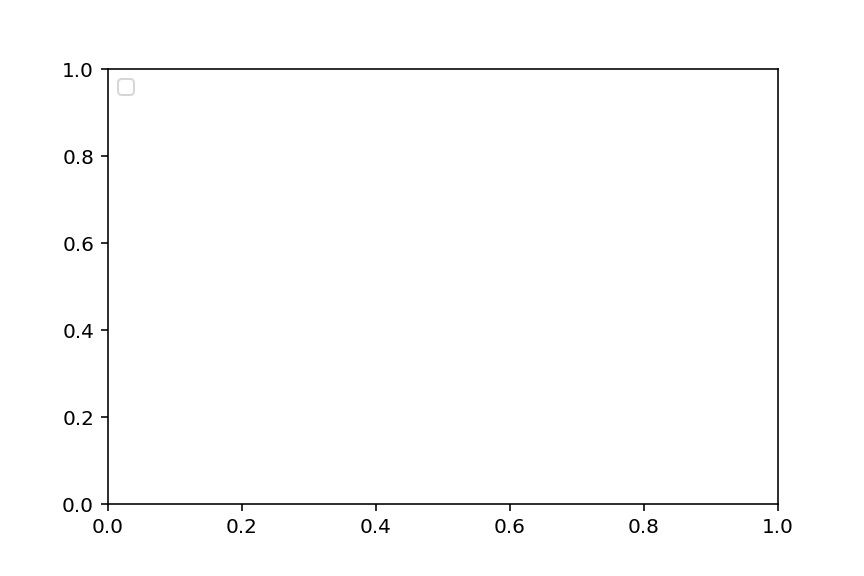

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


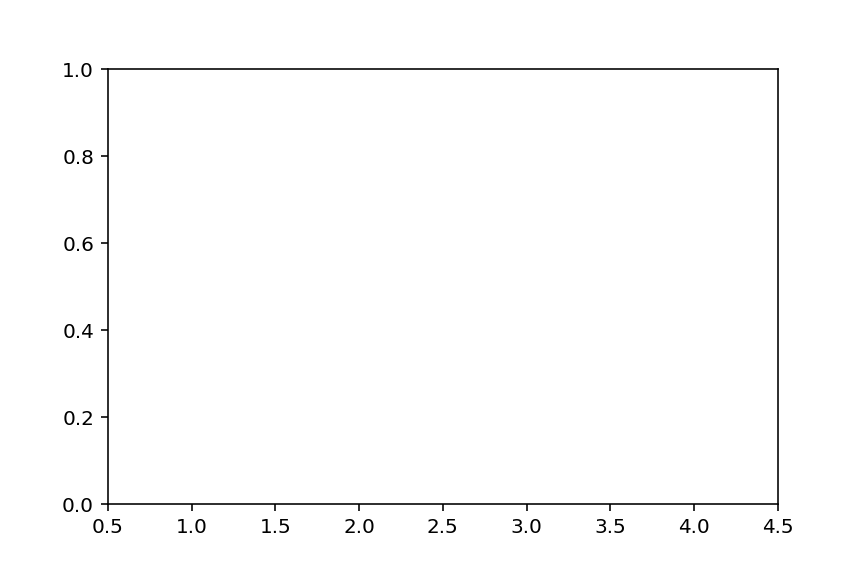

In [24]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [25]:
%matplotlib notebook

<IPython.core.display.Javascript object>


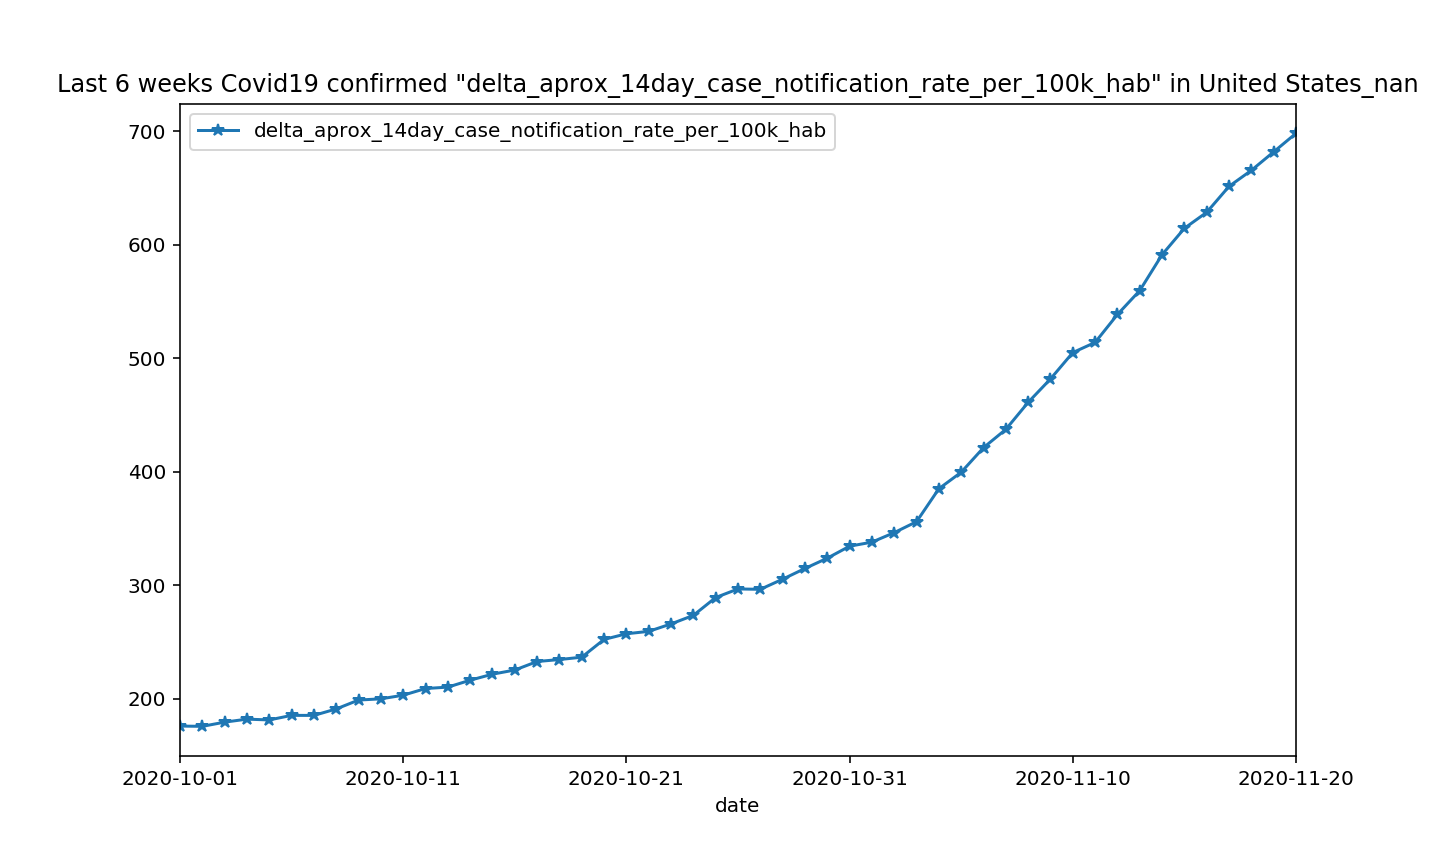

In [26]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


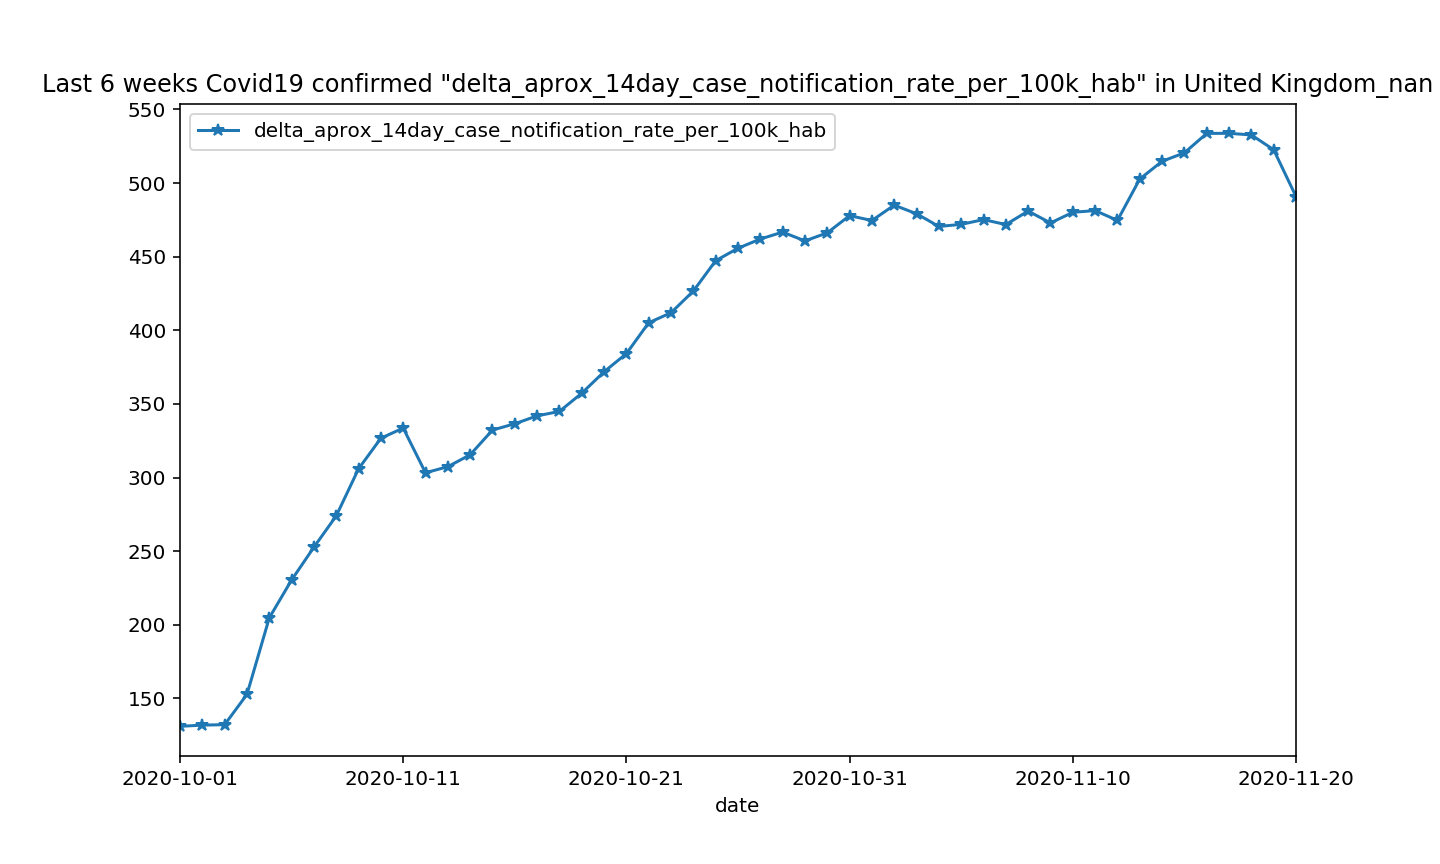

In [27]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


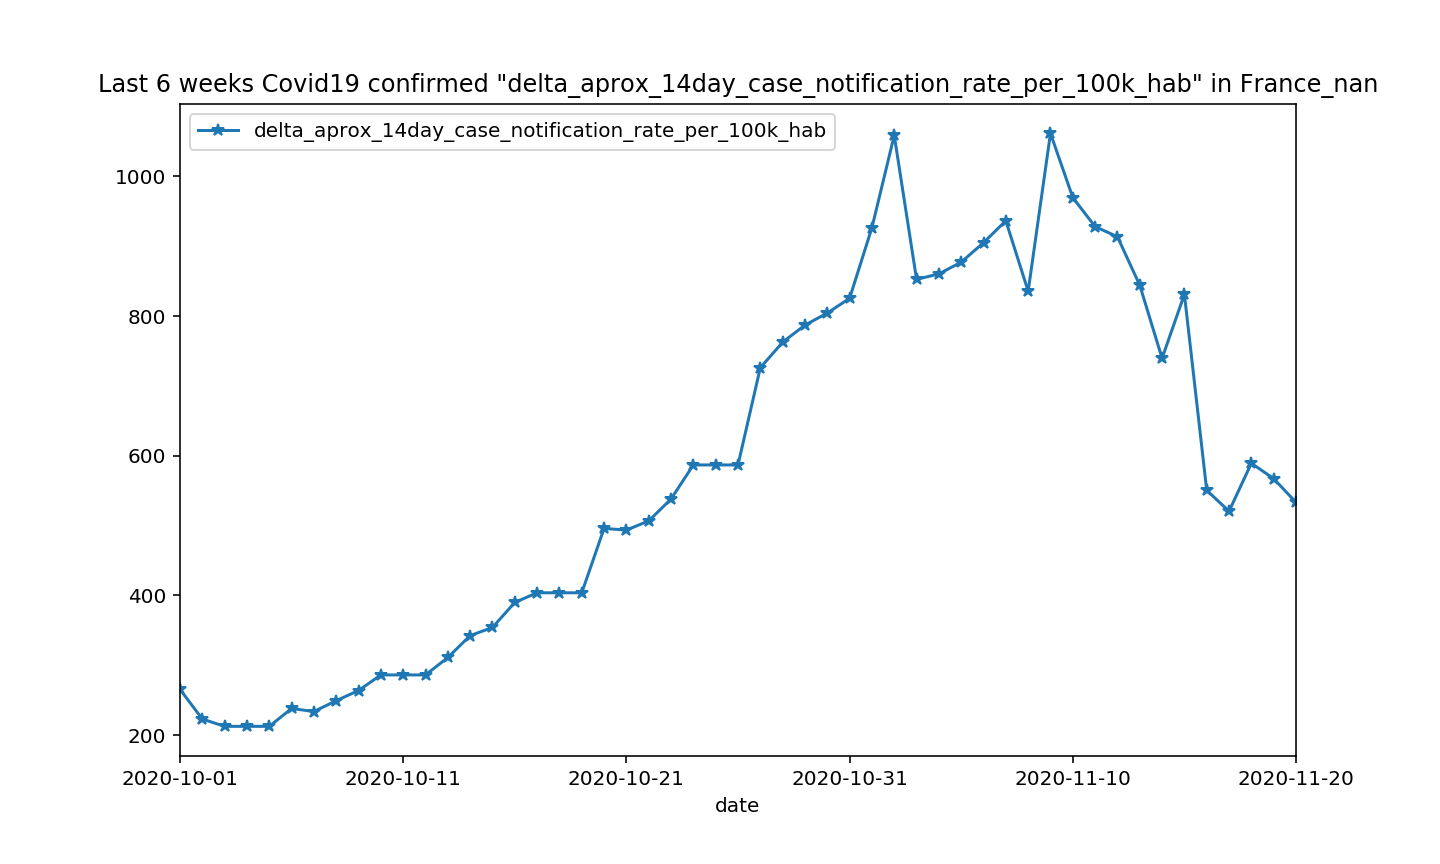

In [28]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


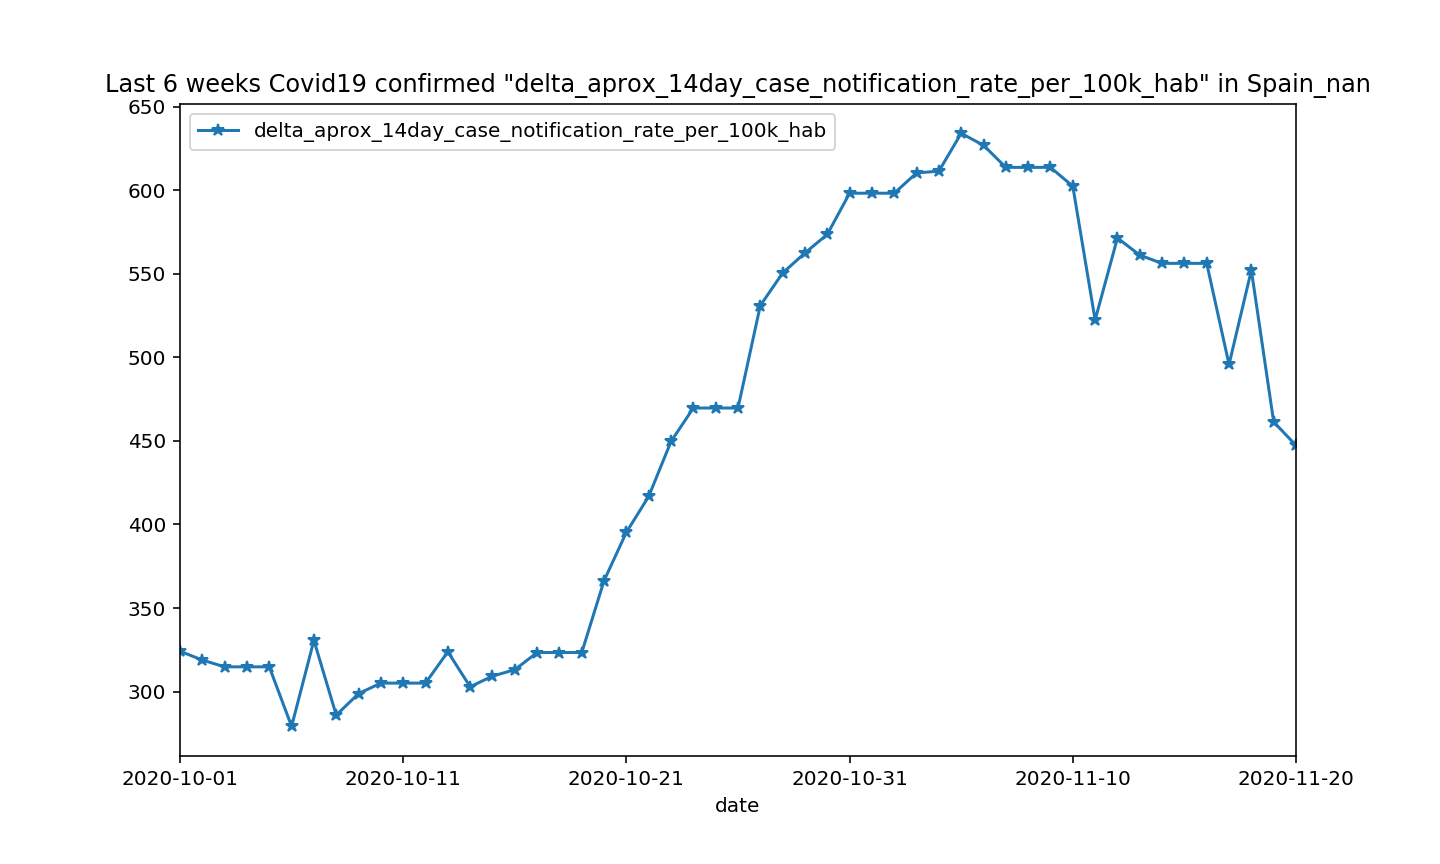

In [29]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


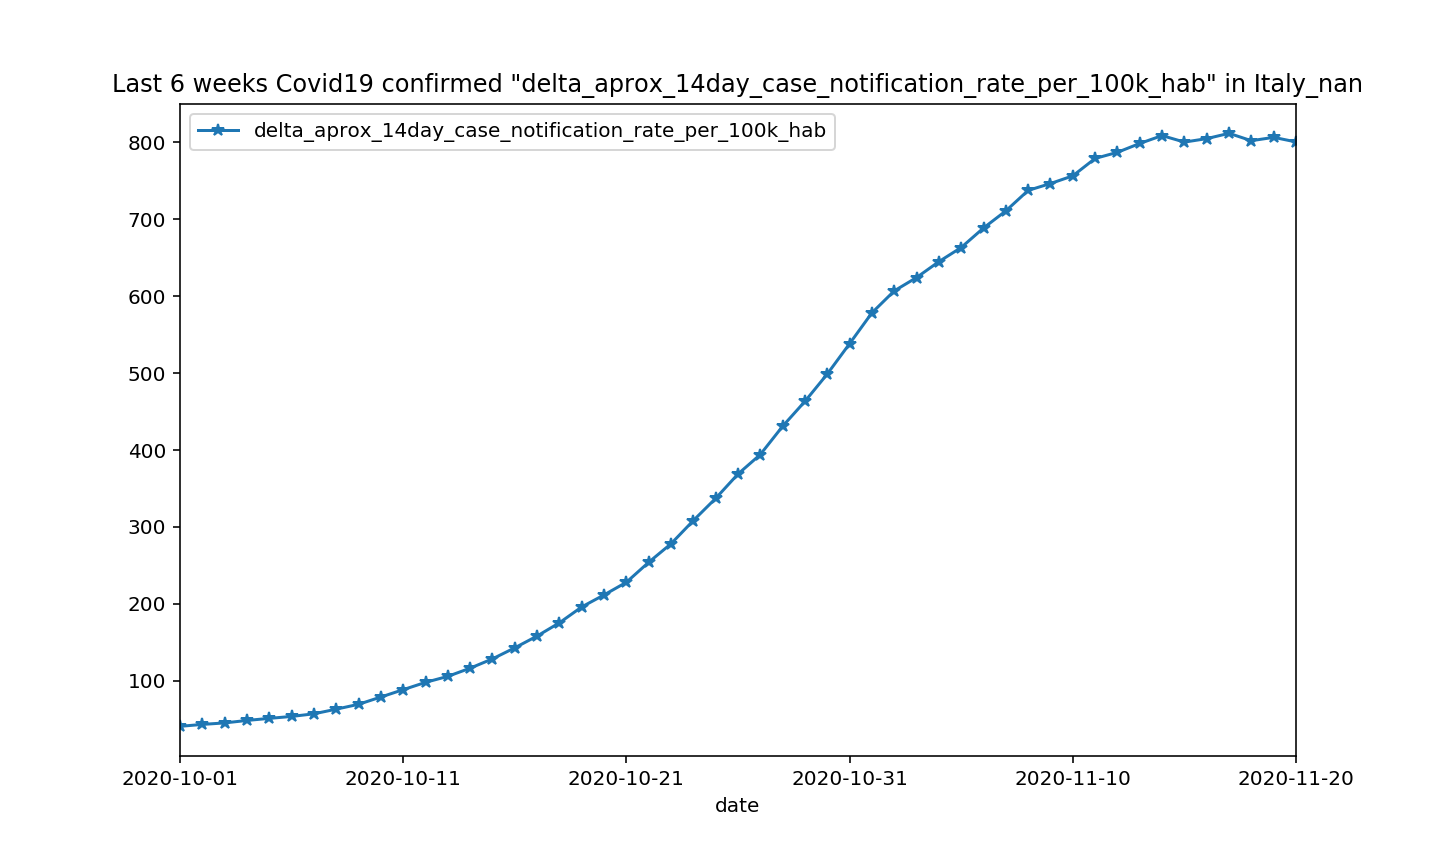

In [30]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


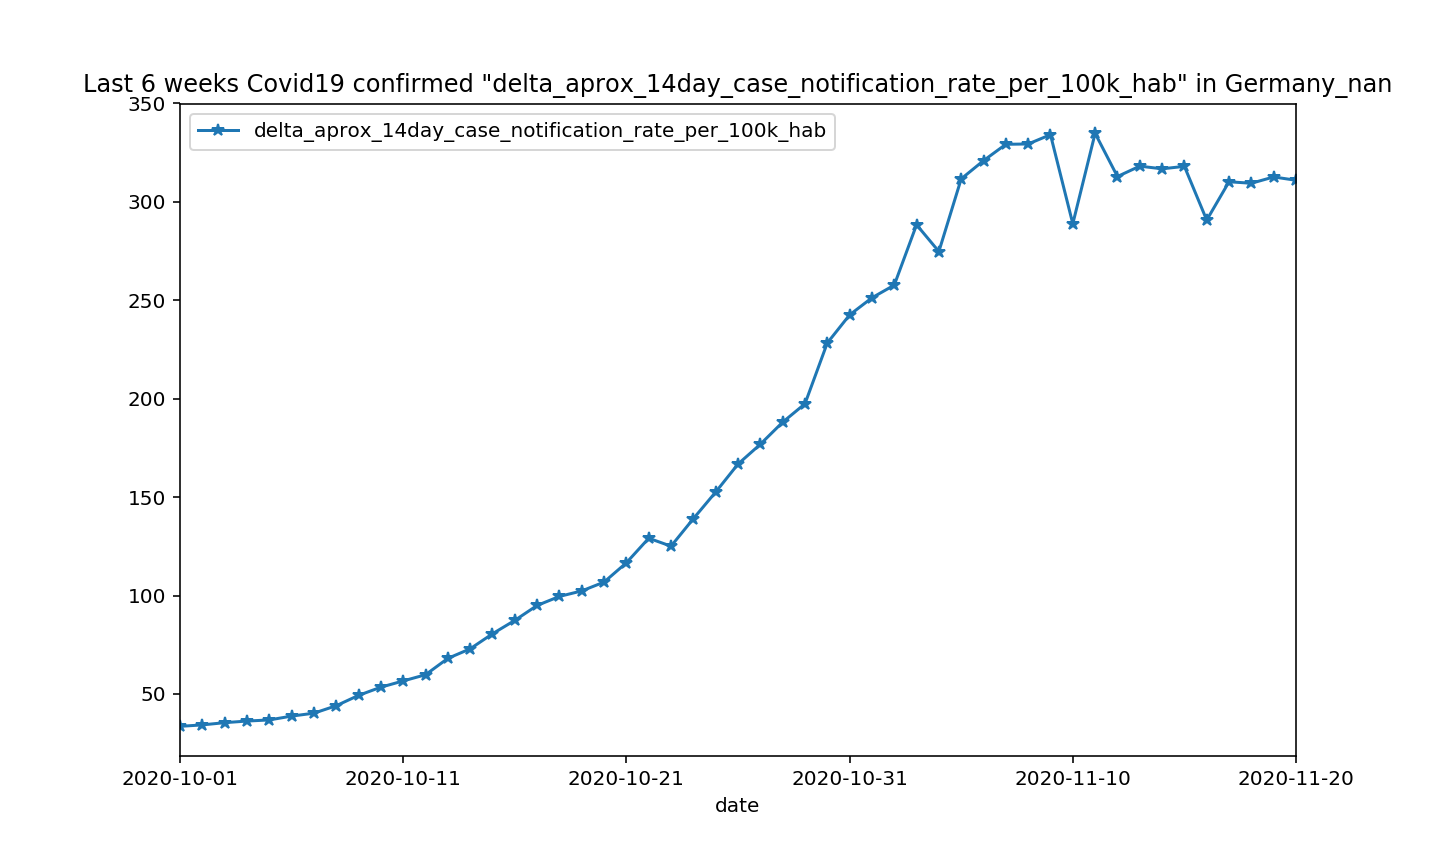

In [31]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


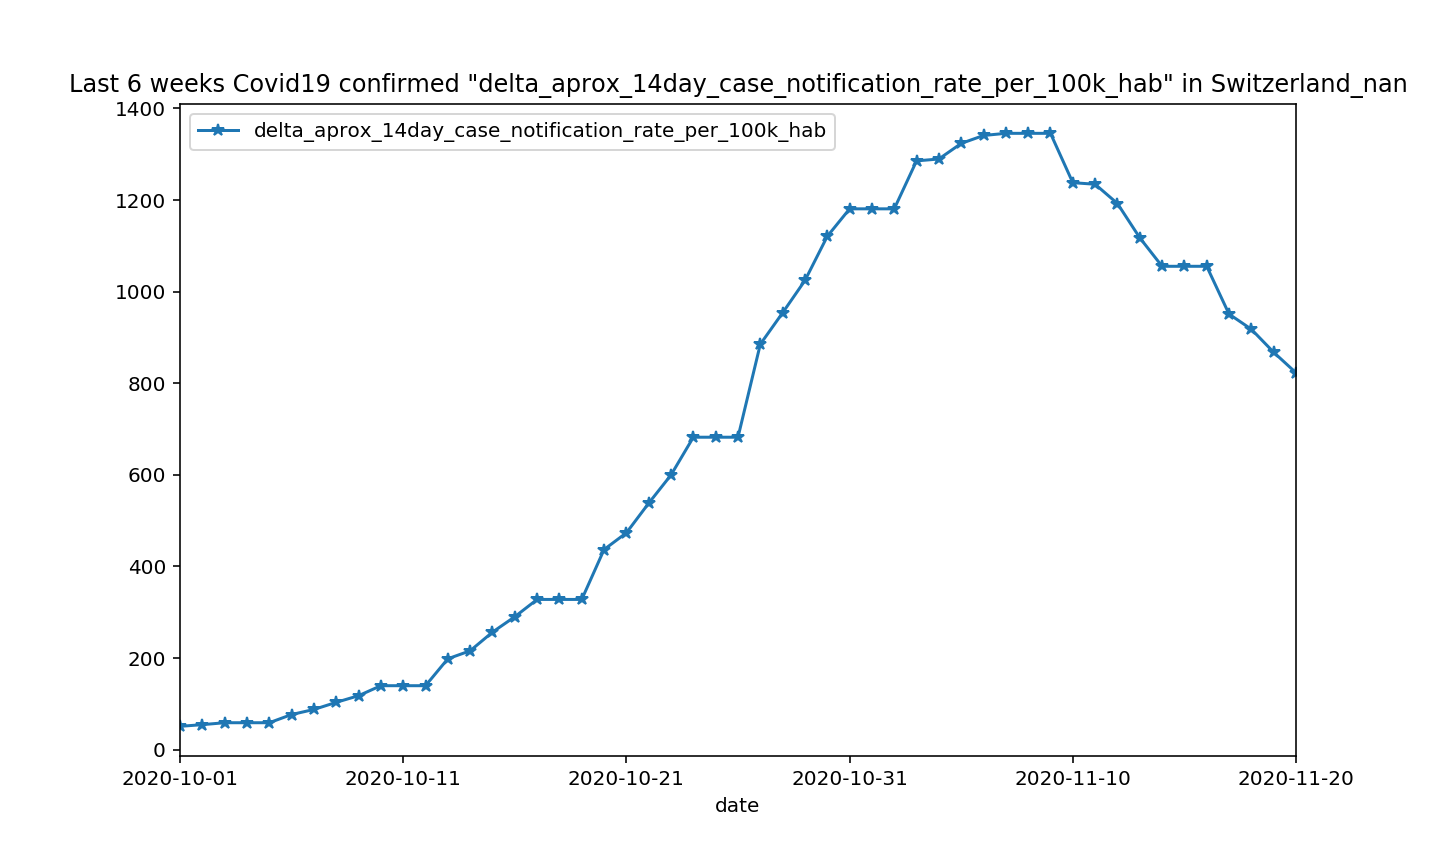

In [32]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


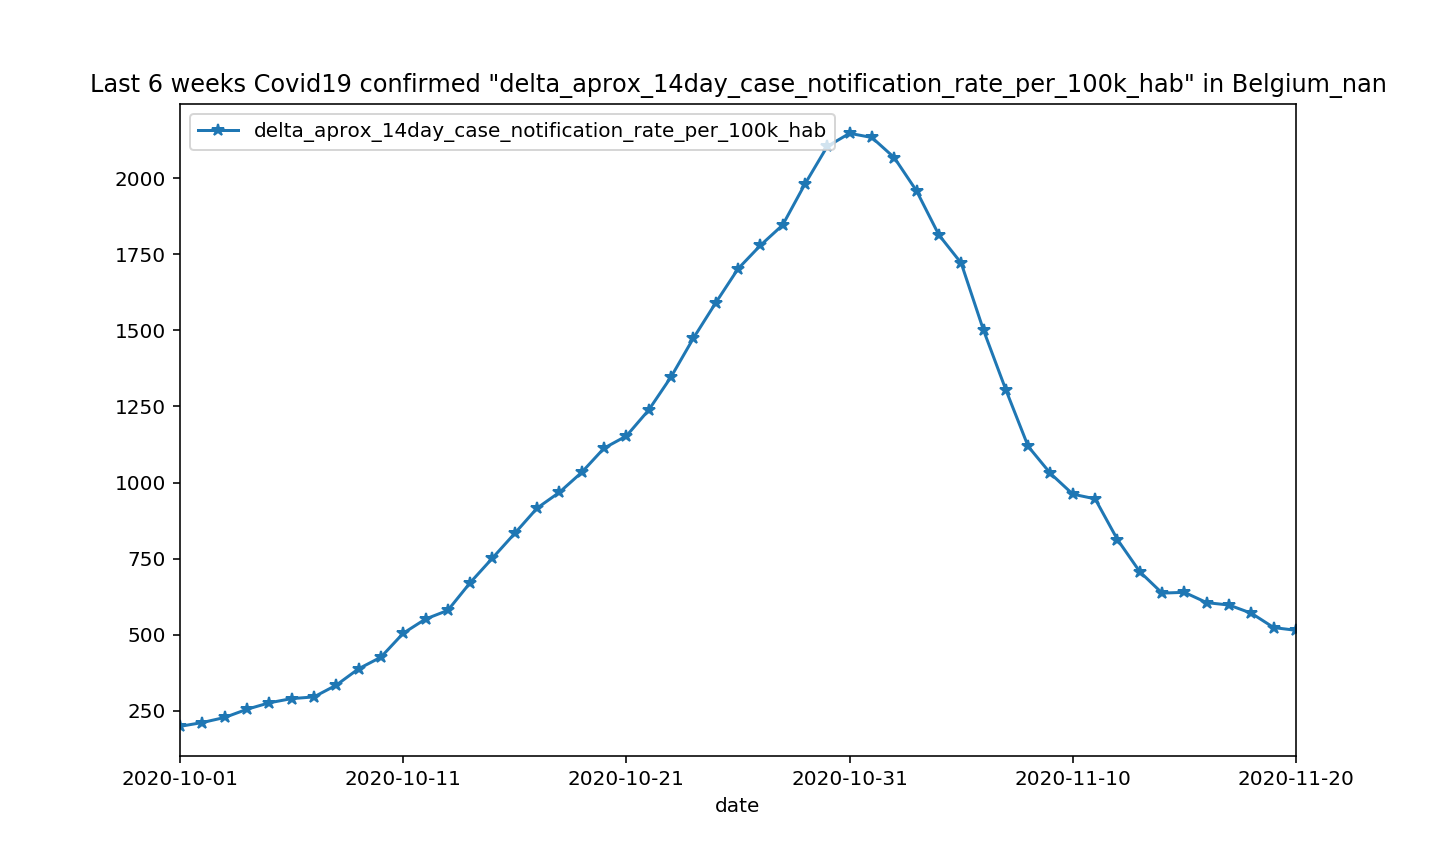

In [33]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


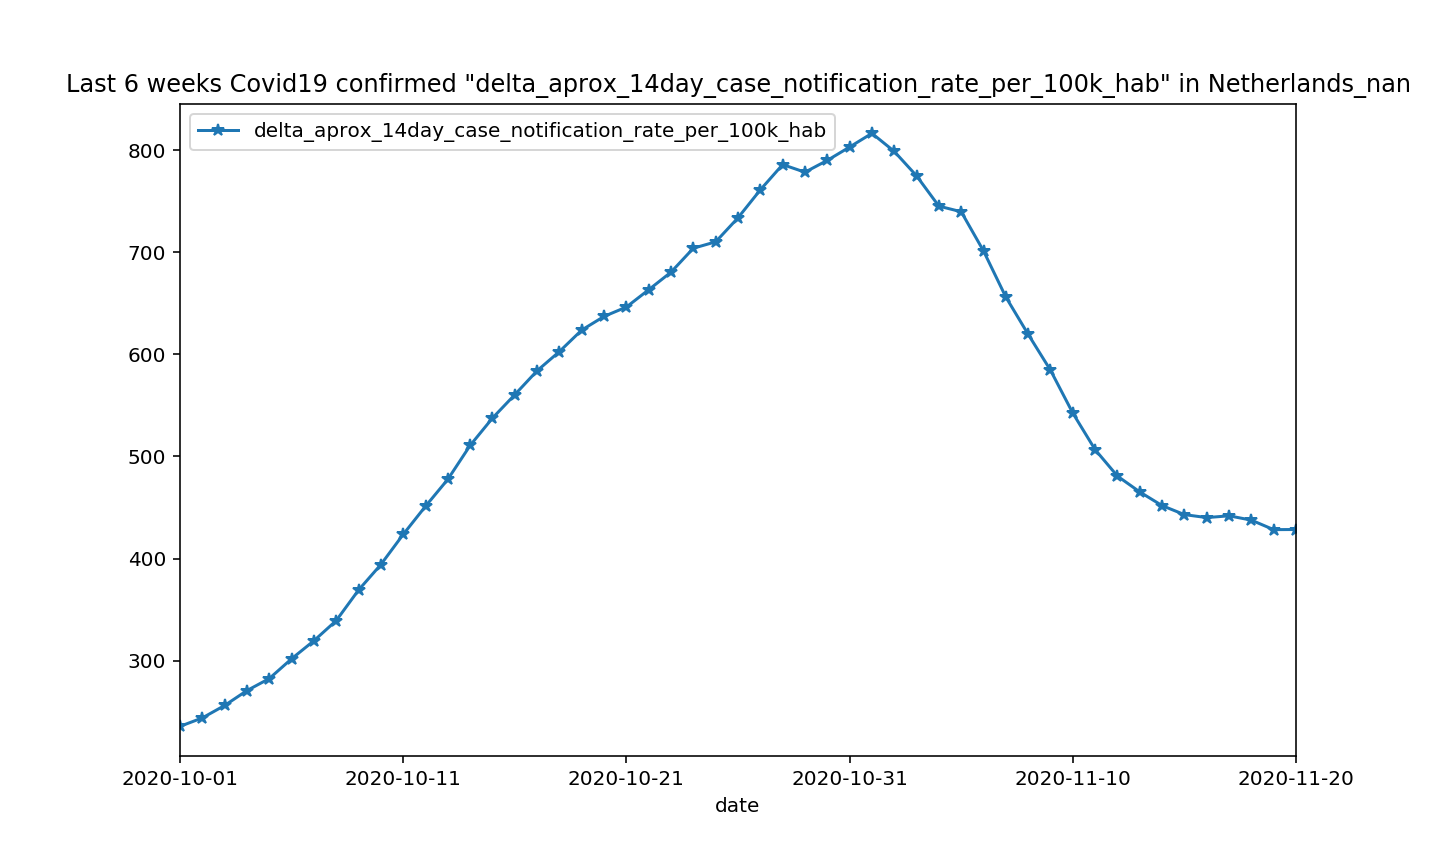

In [34]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


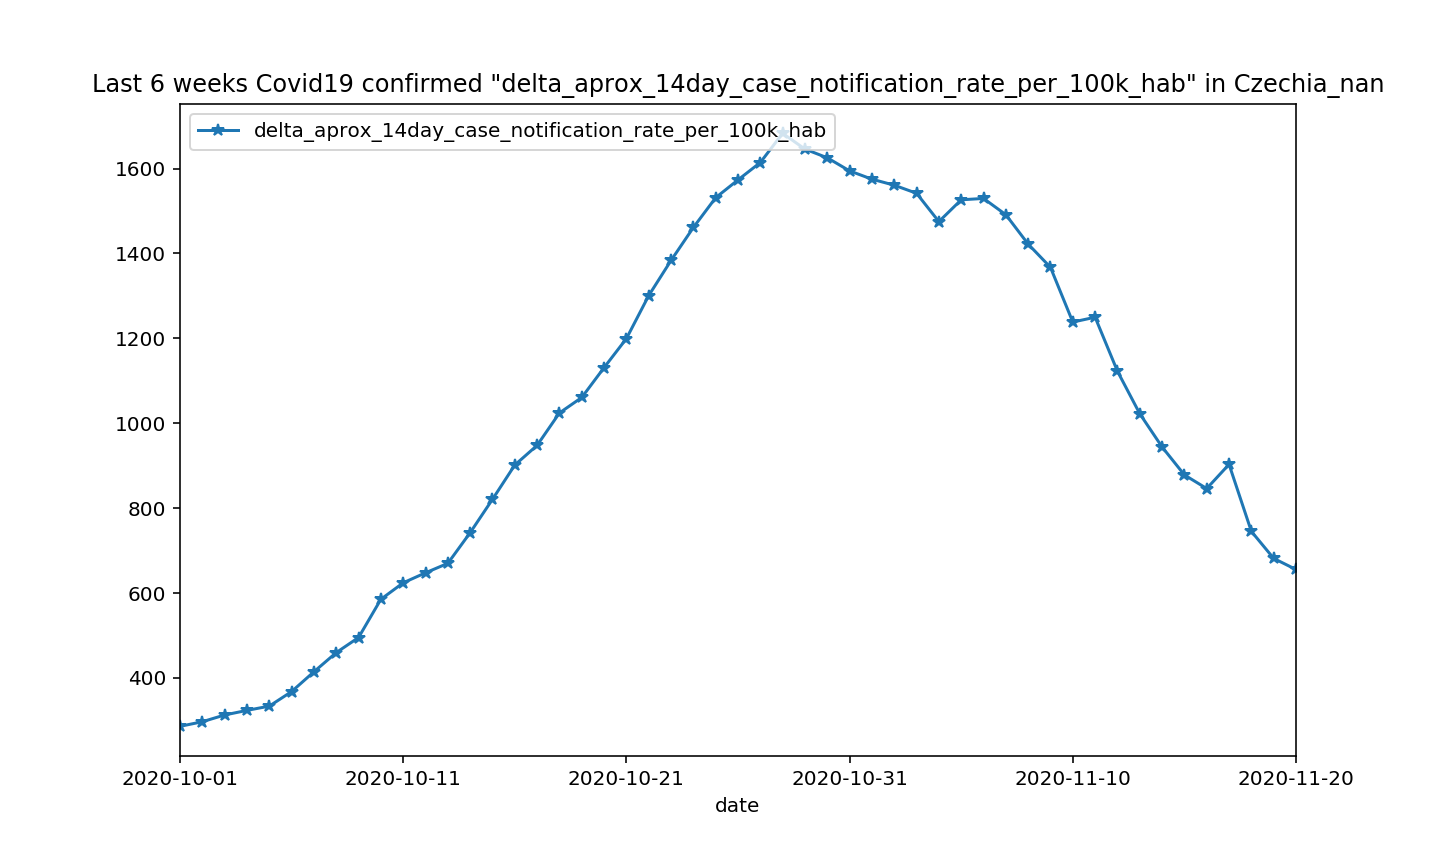

In [35]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


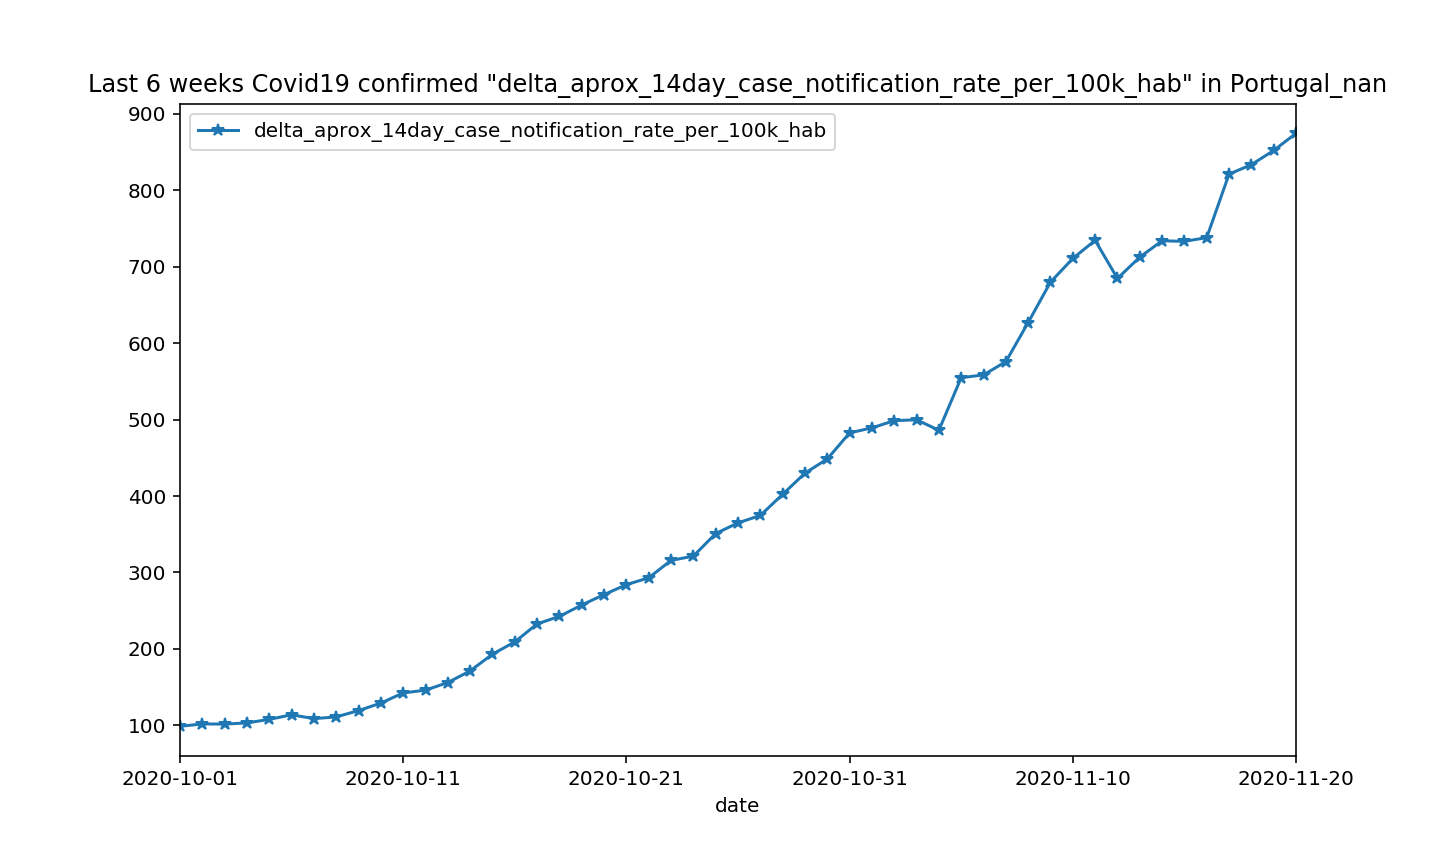

In [36]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [37]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


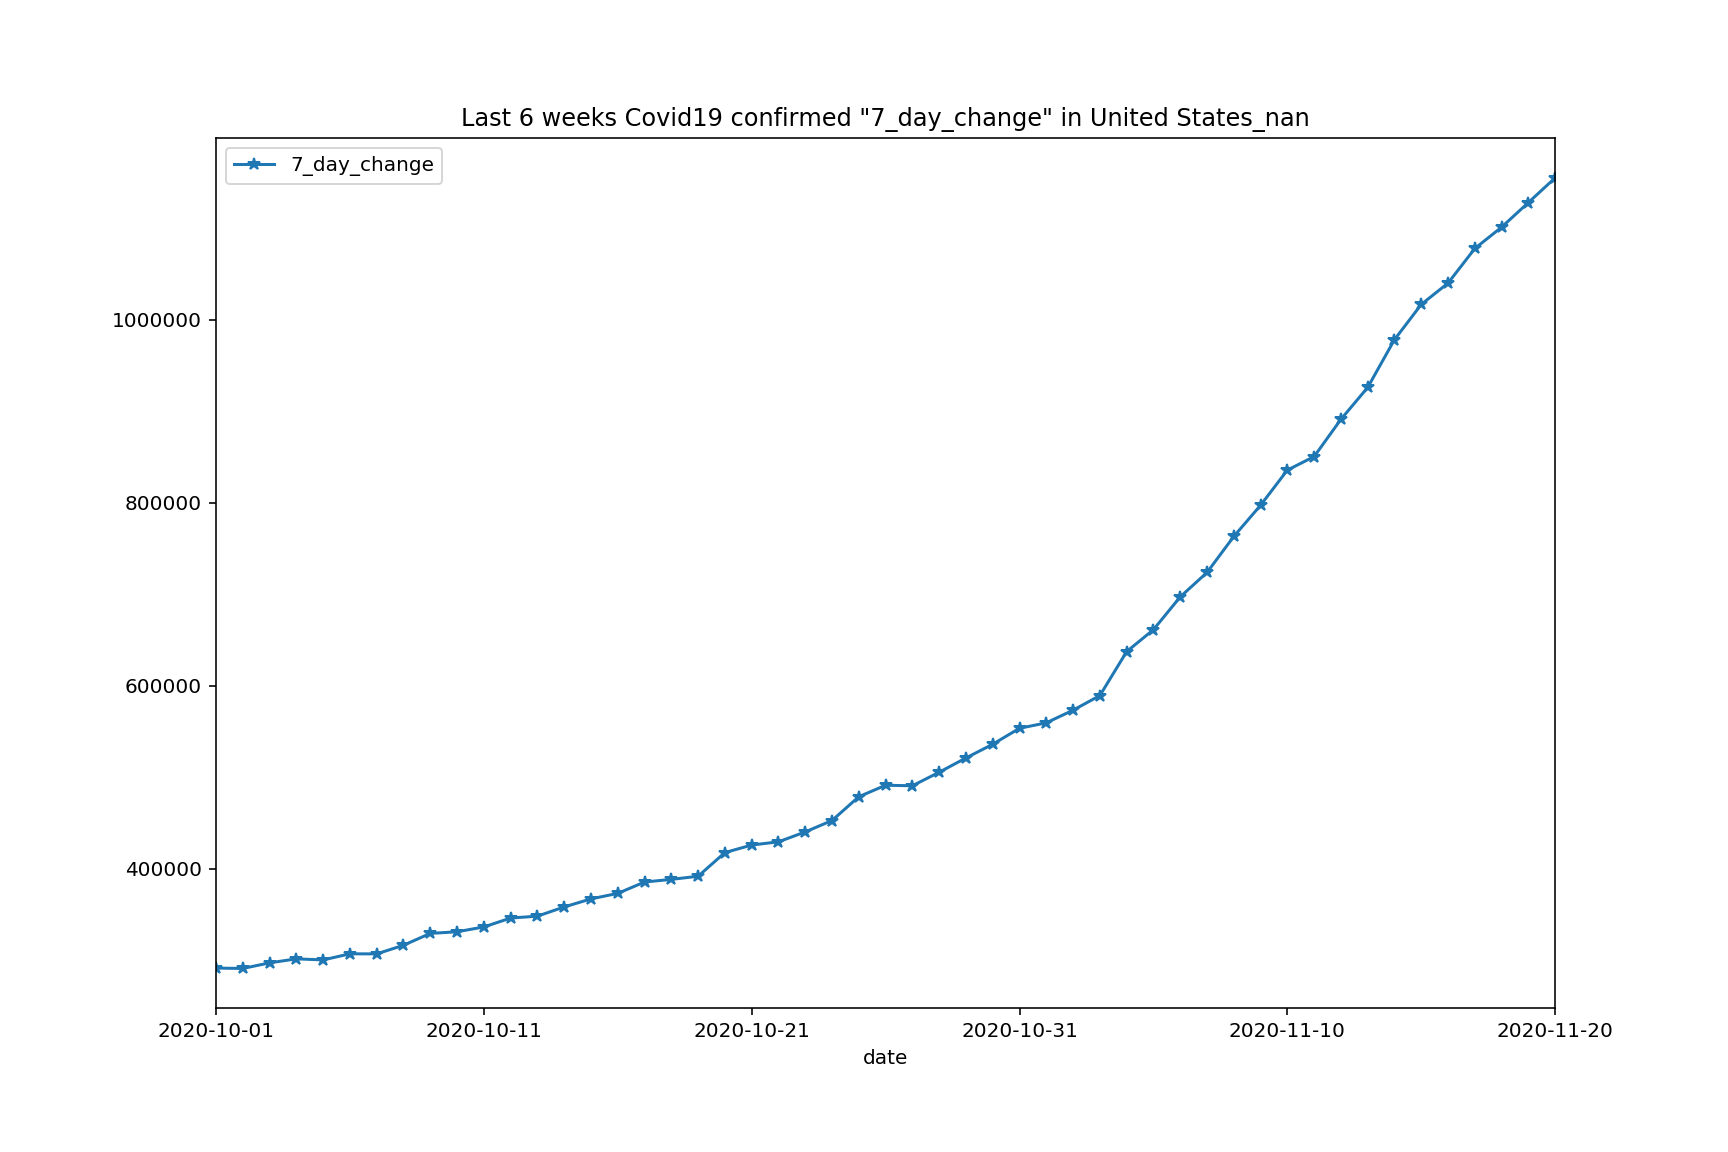

In [38]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


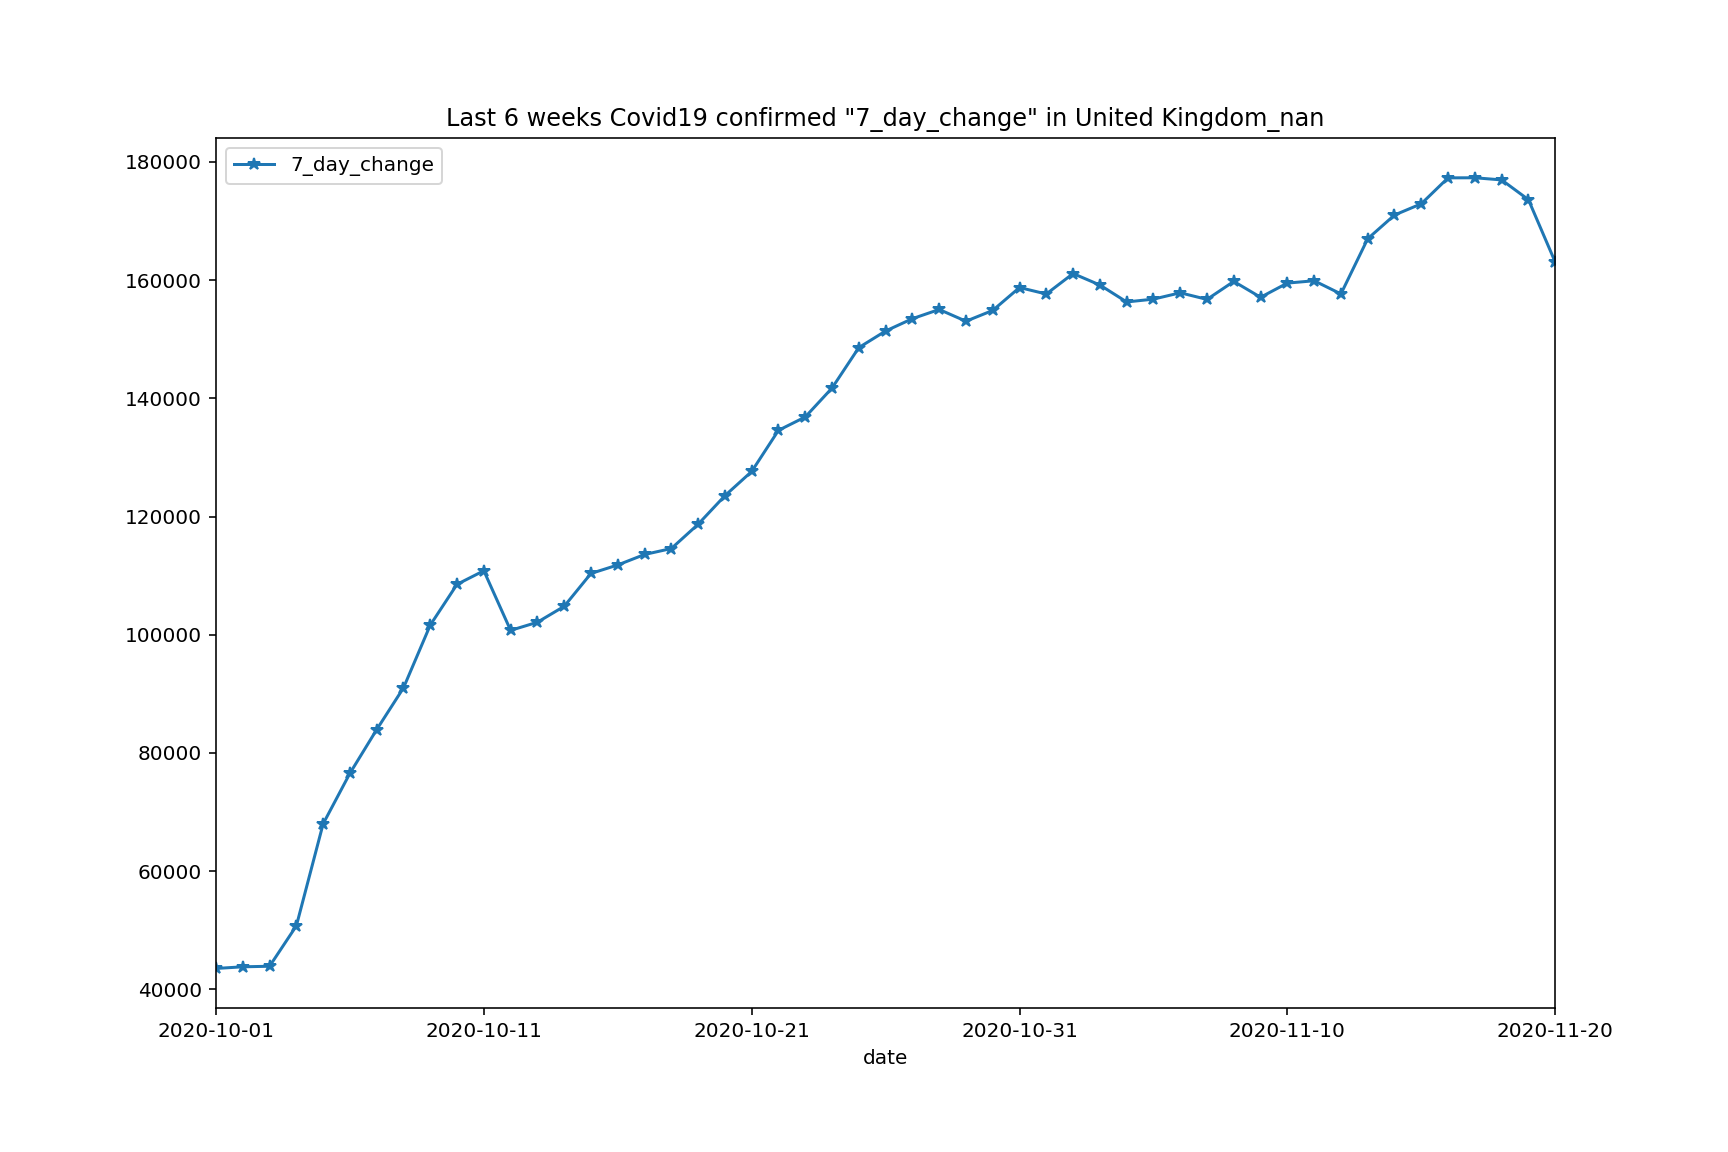

In [39]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


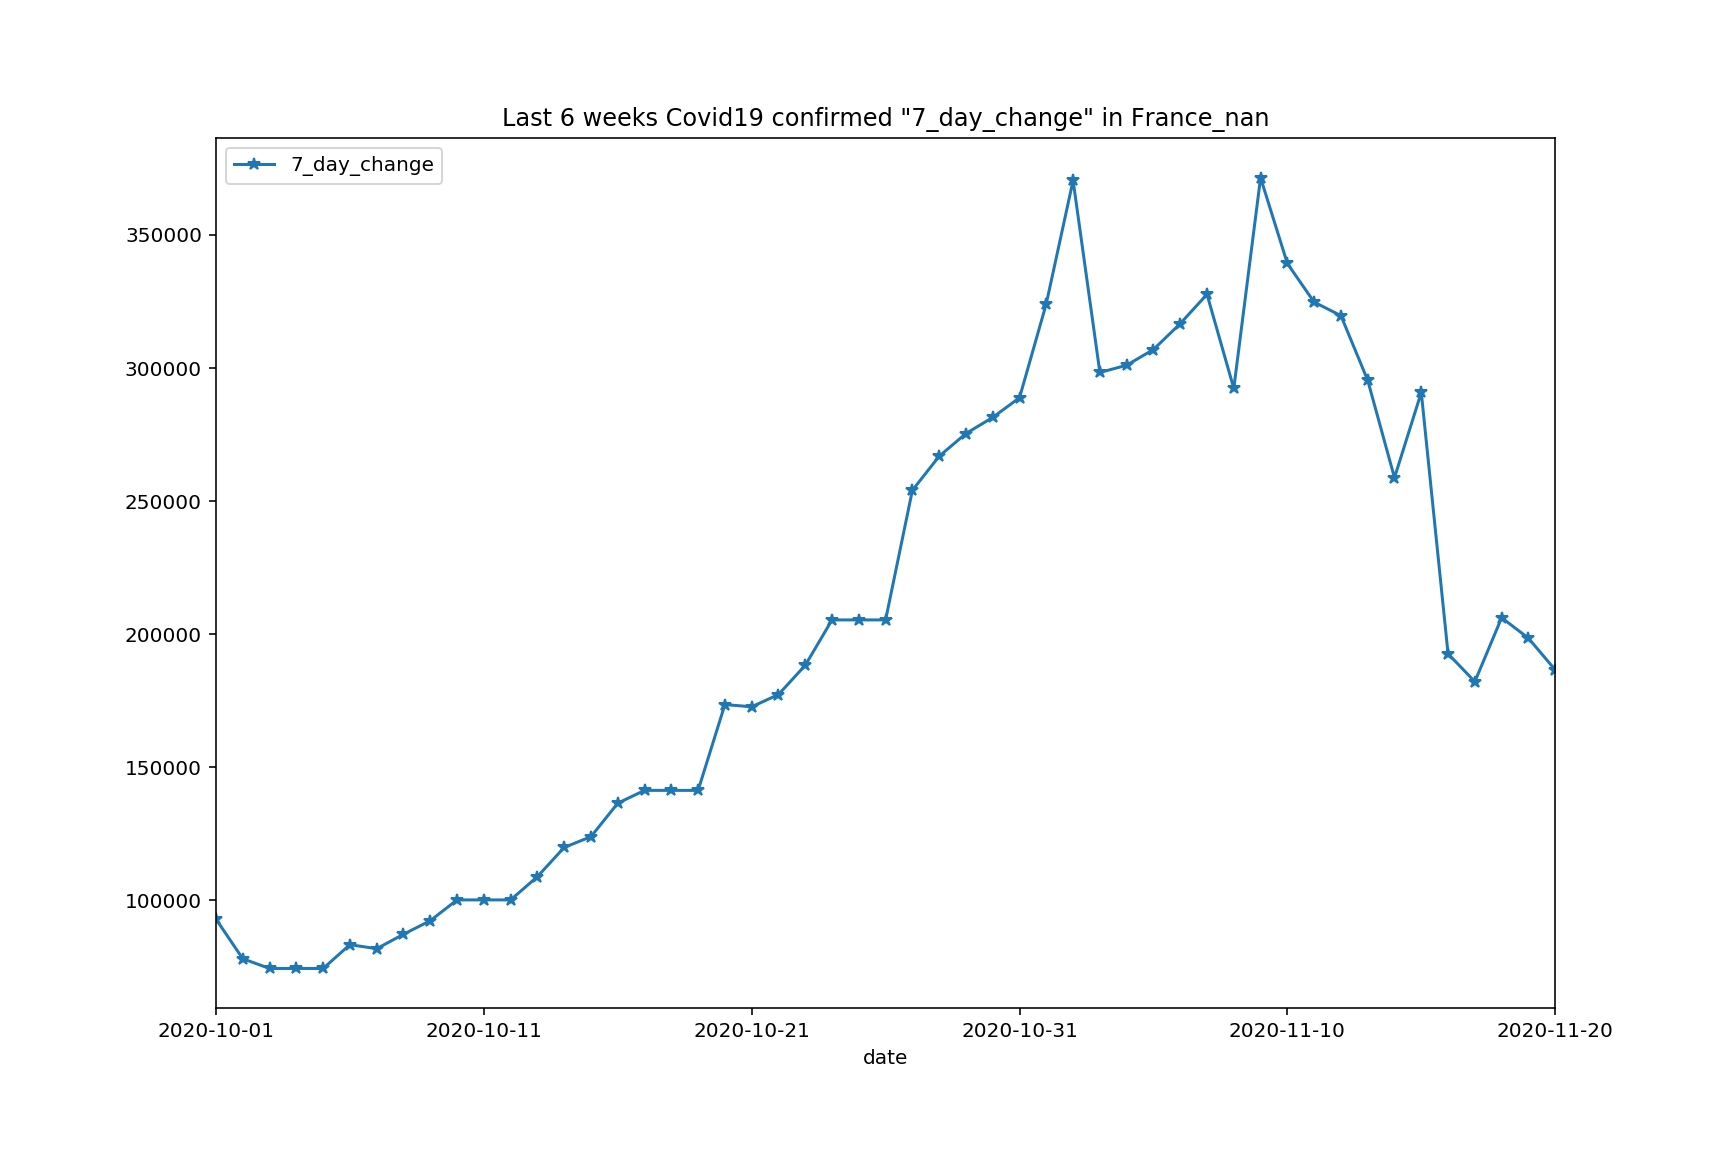

In [40]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


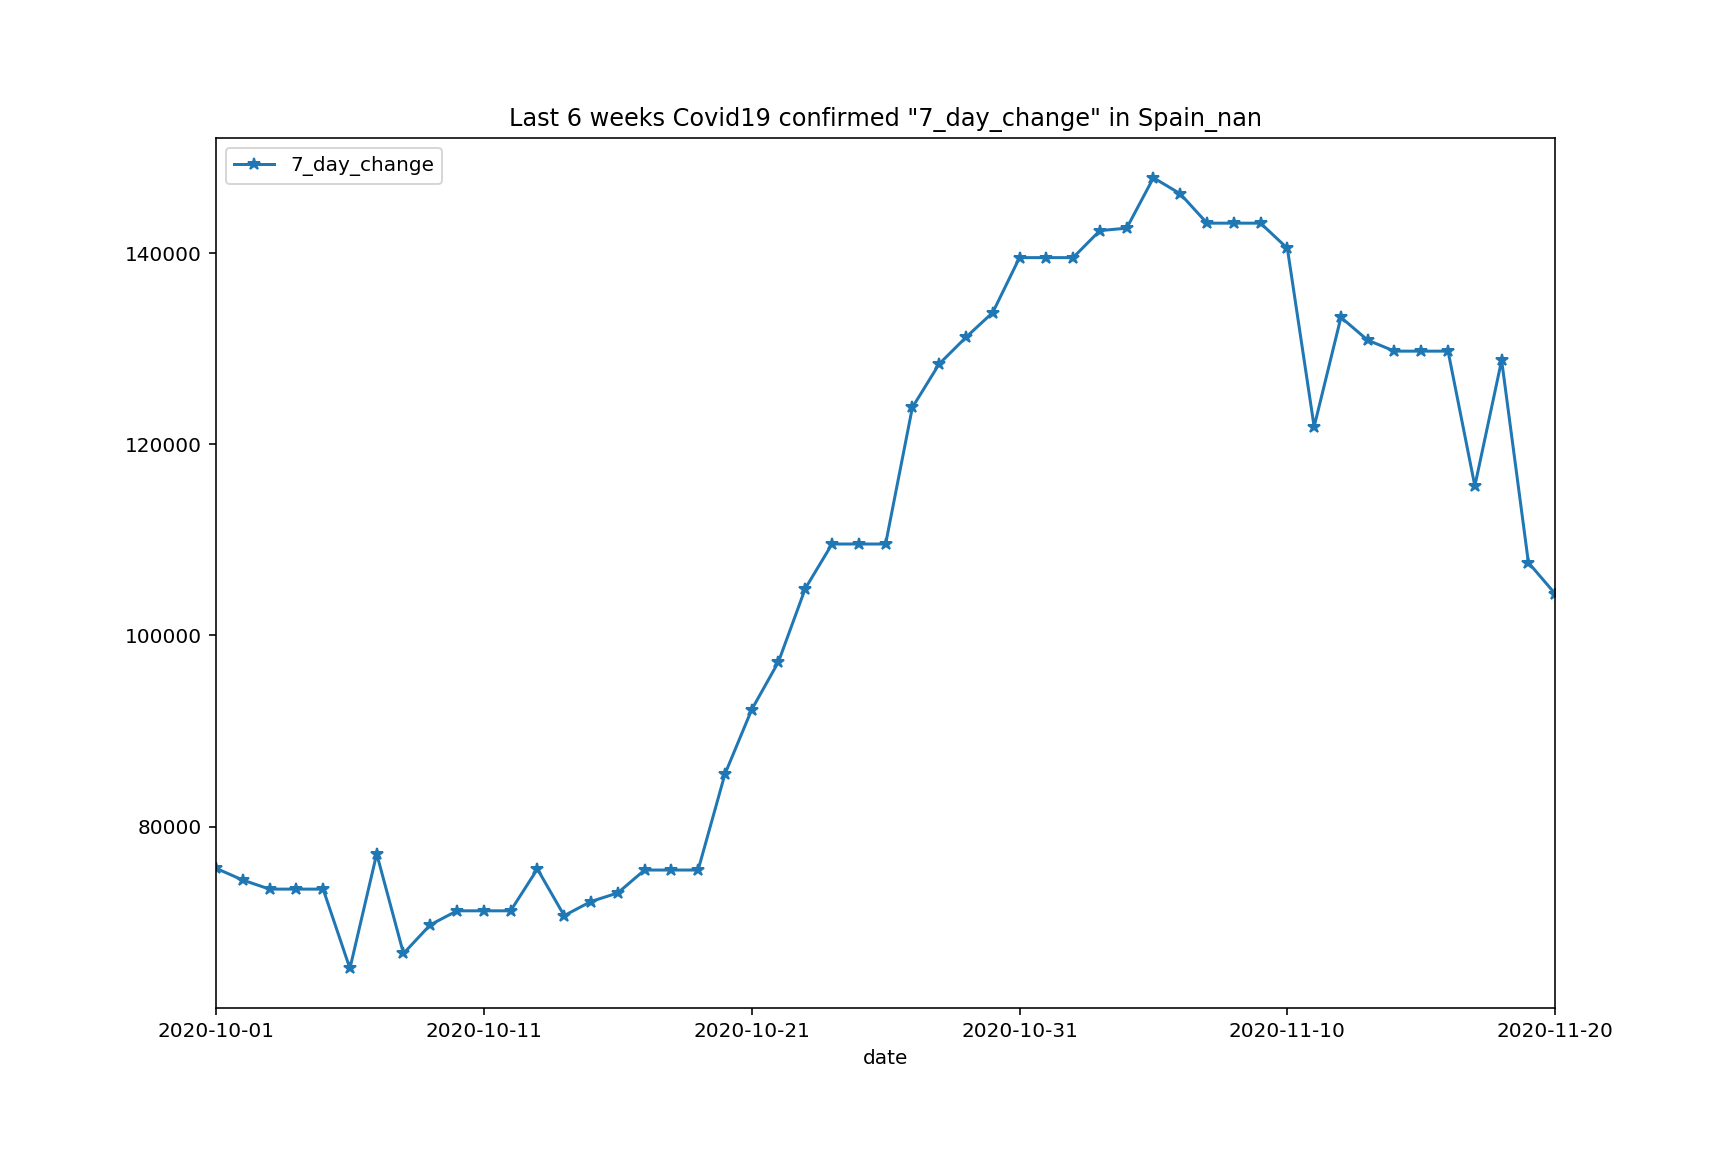

In [41]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


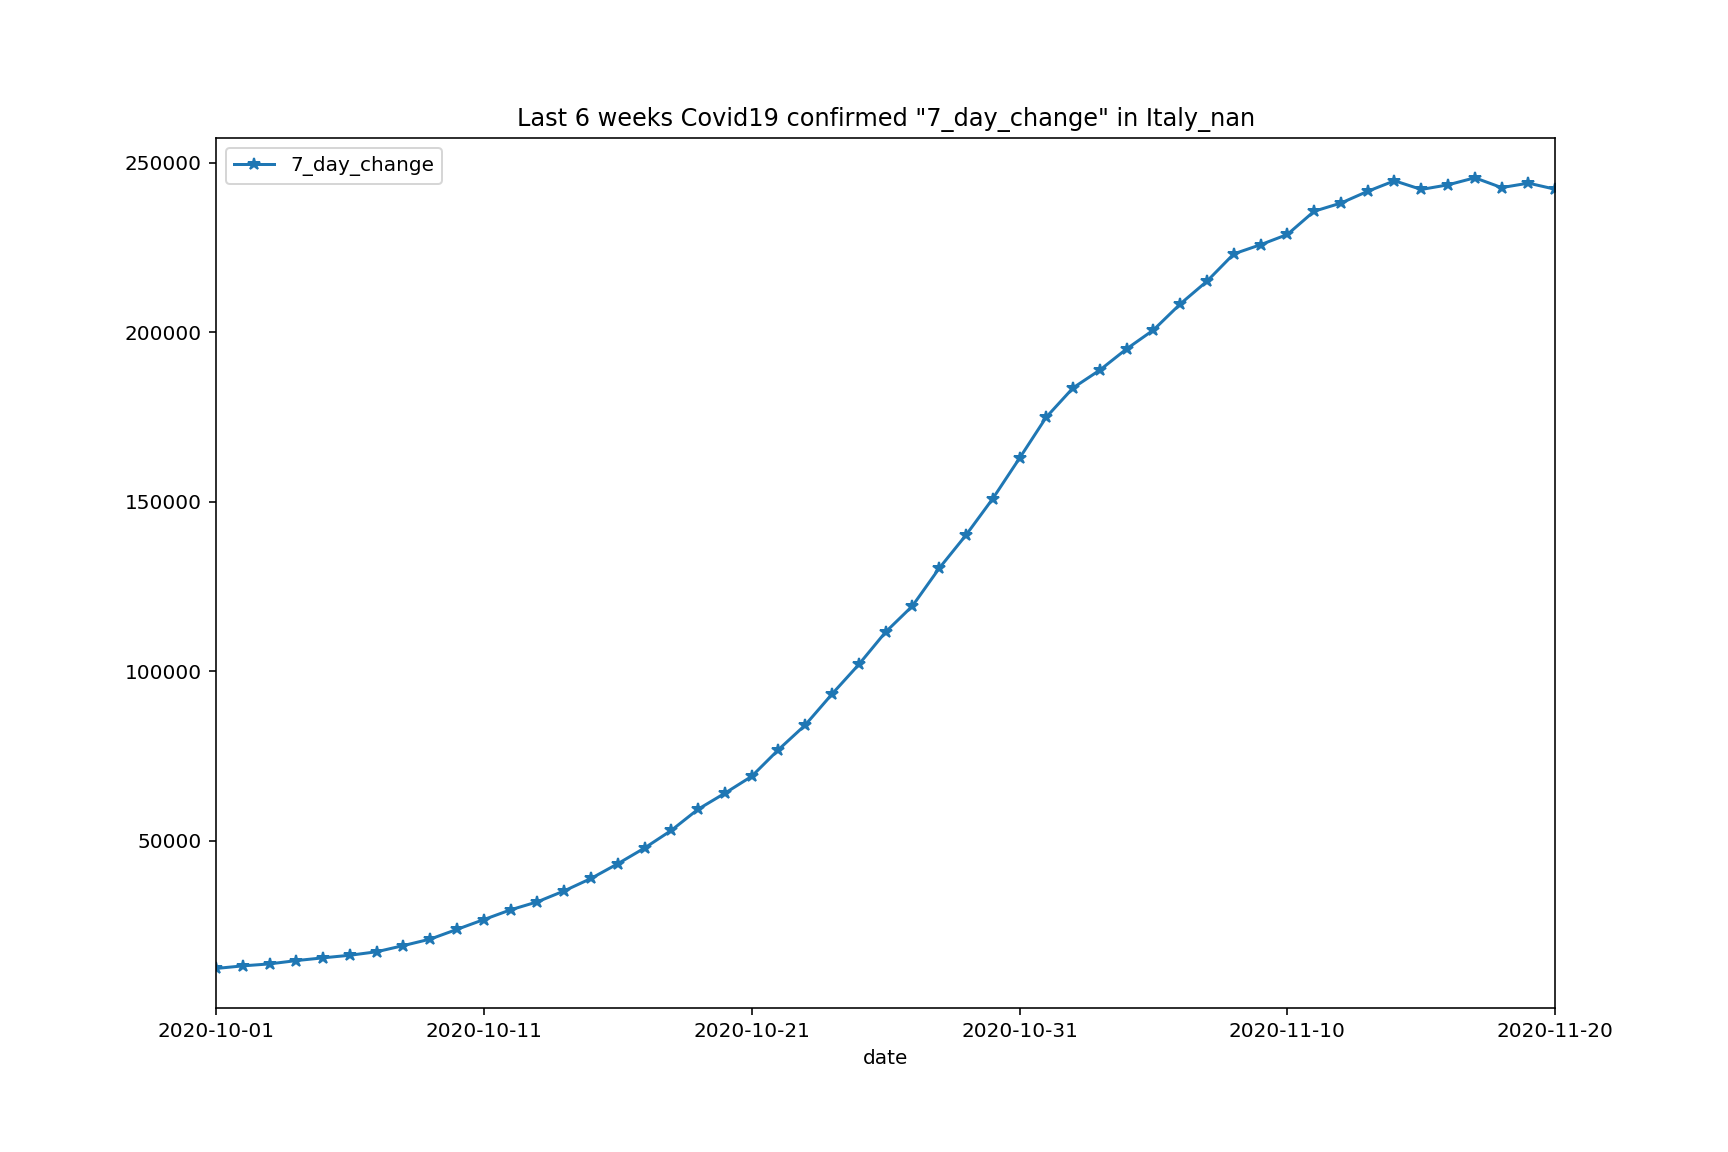

In [42]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


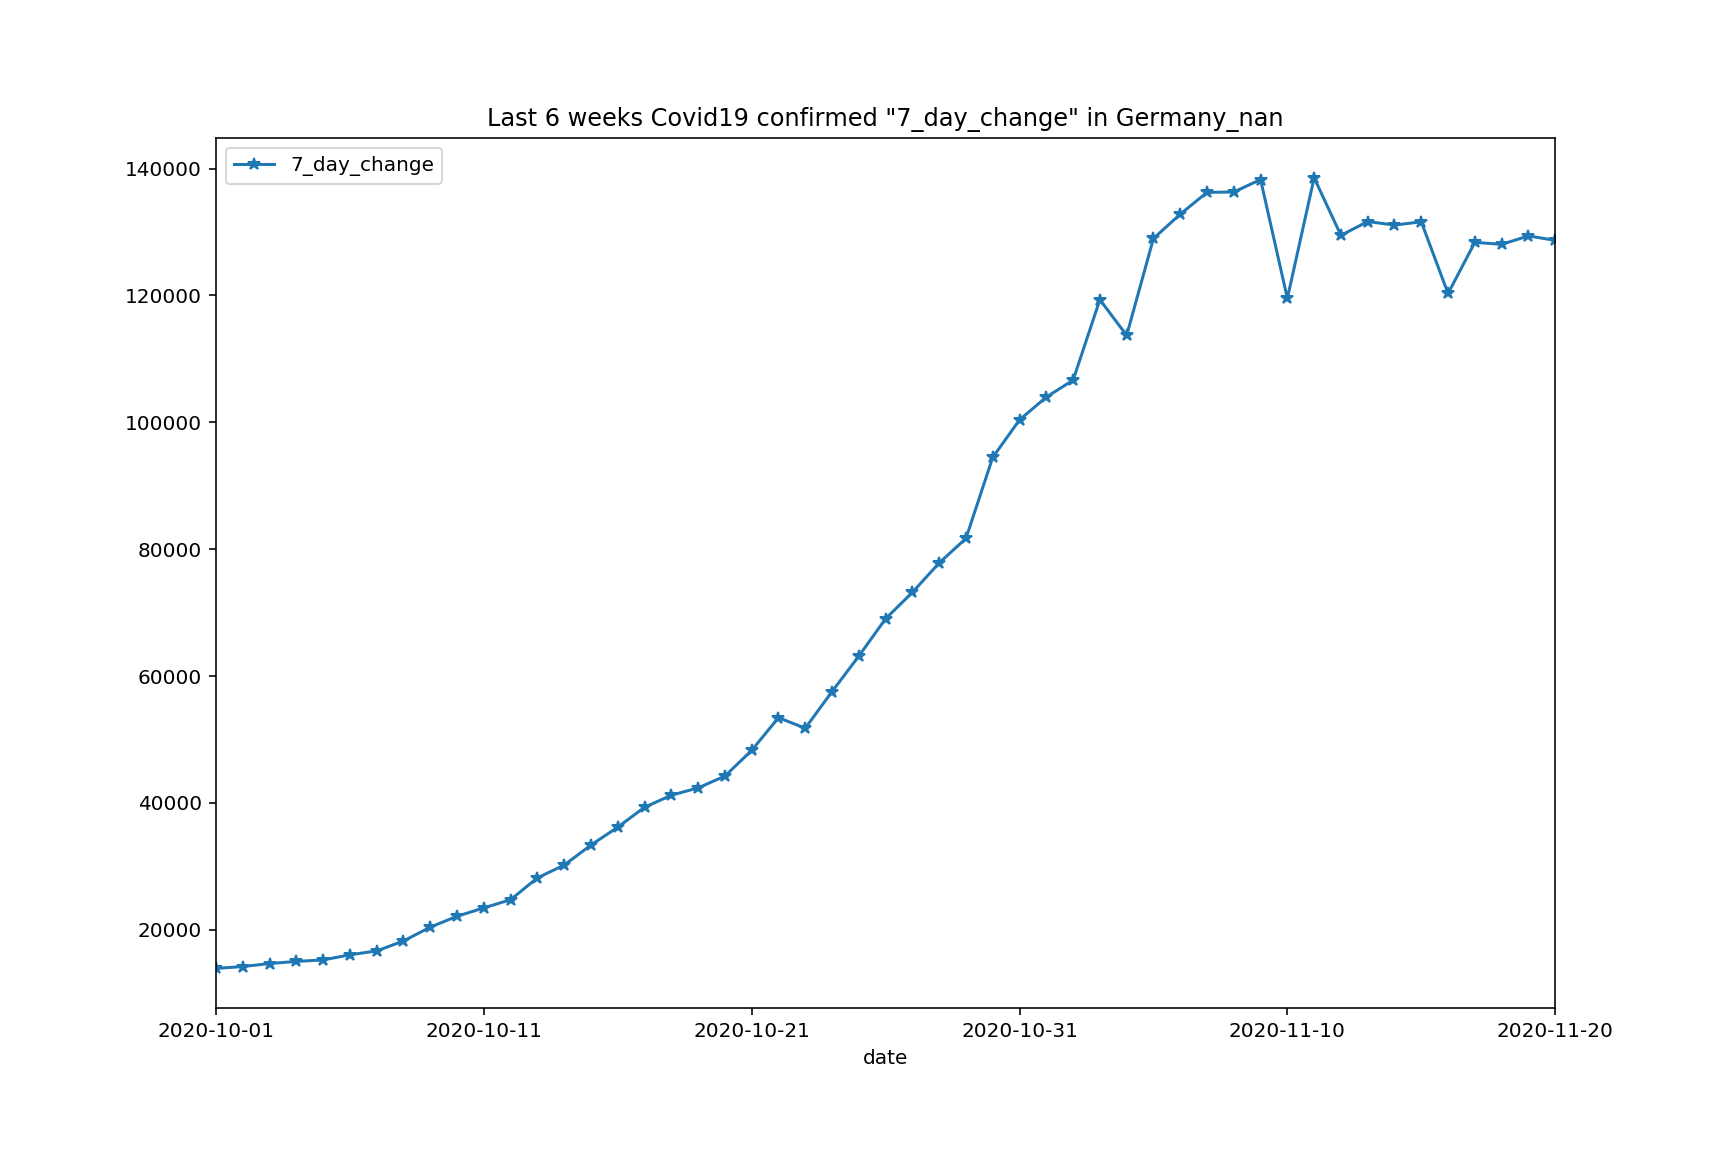

In [43]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


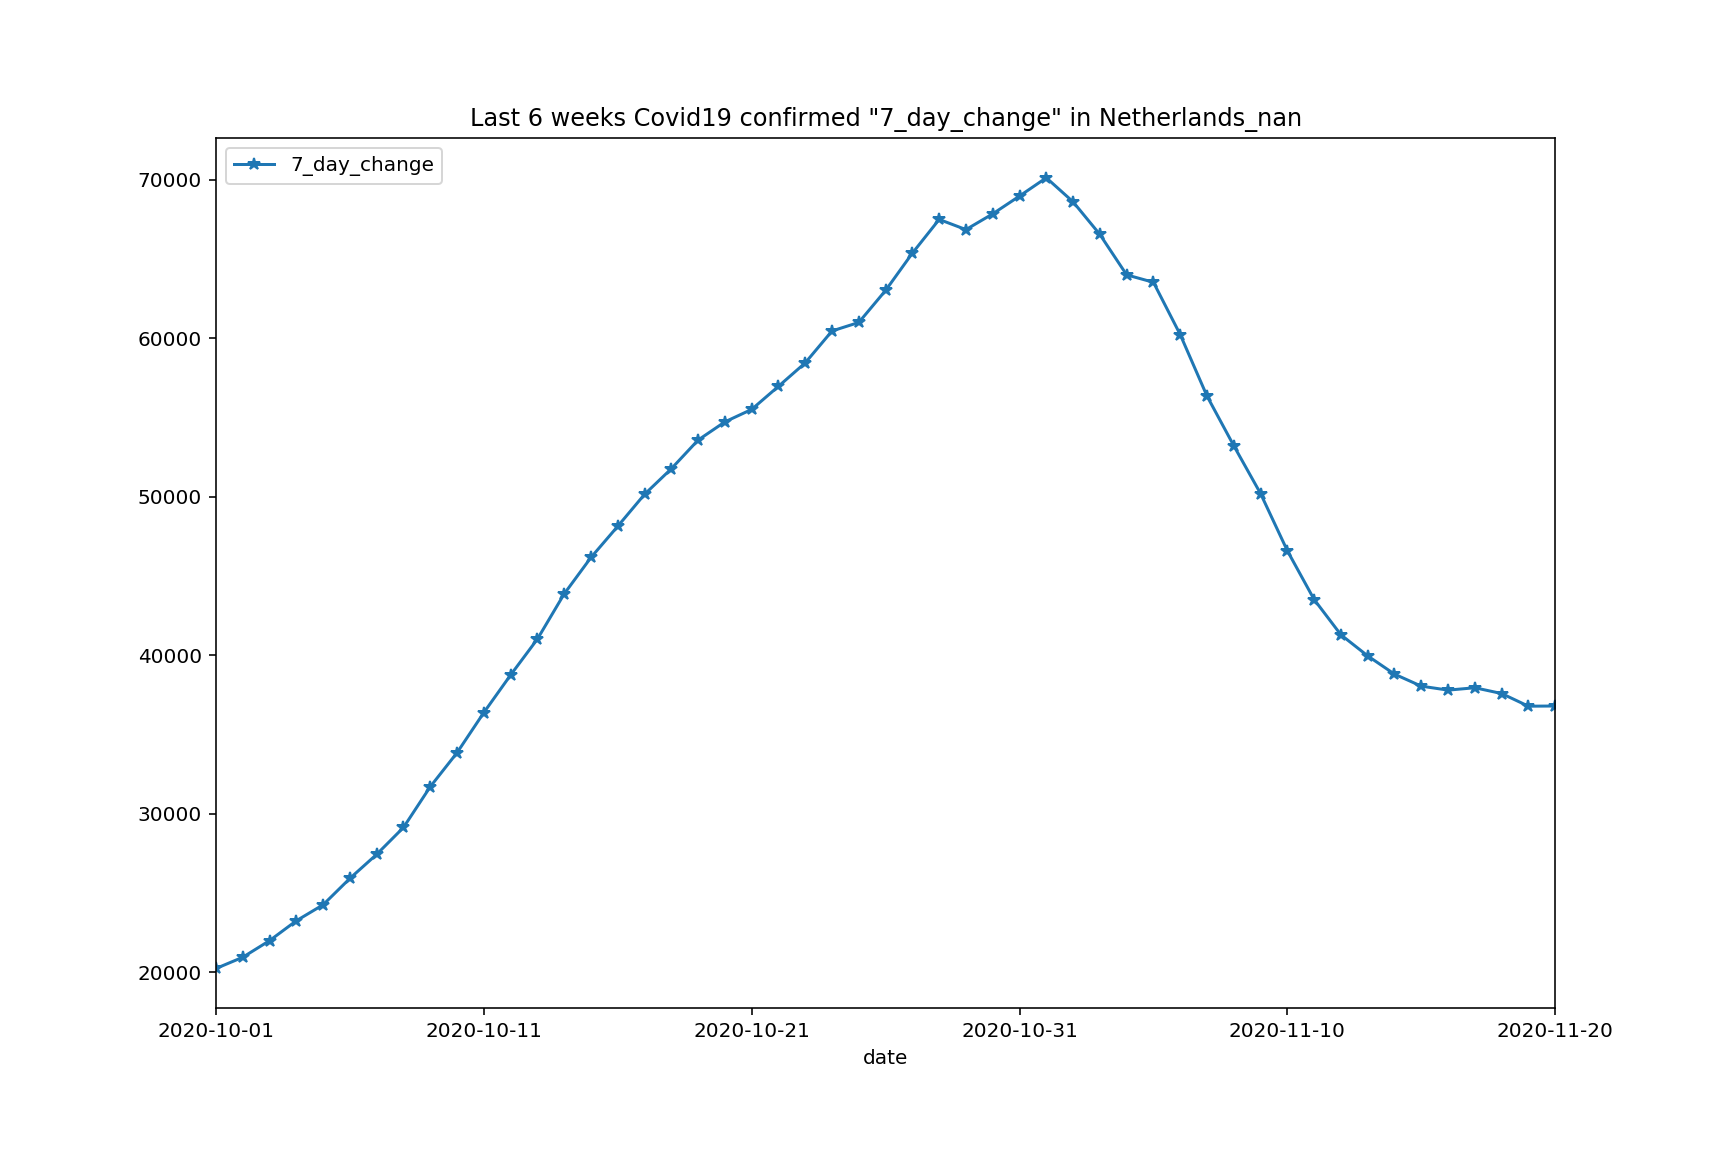

In [44]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


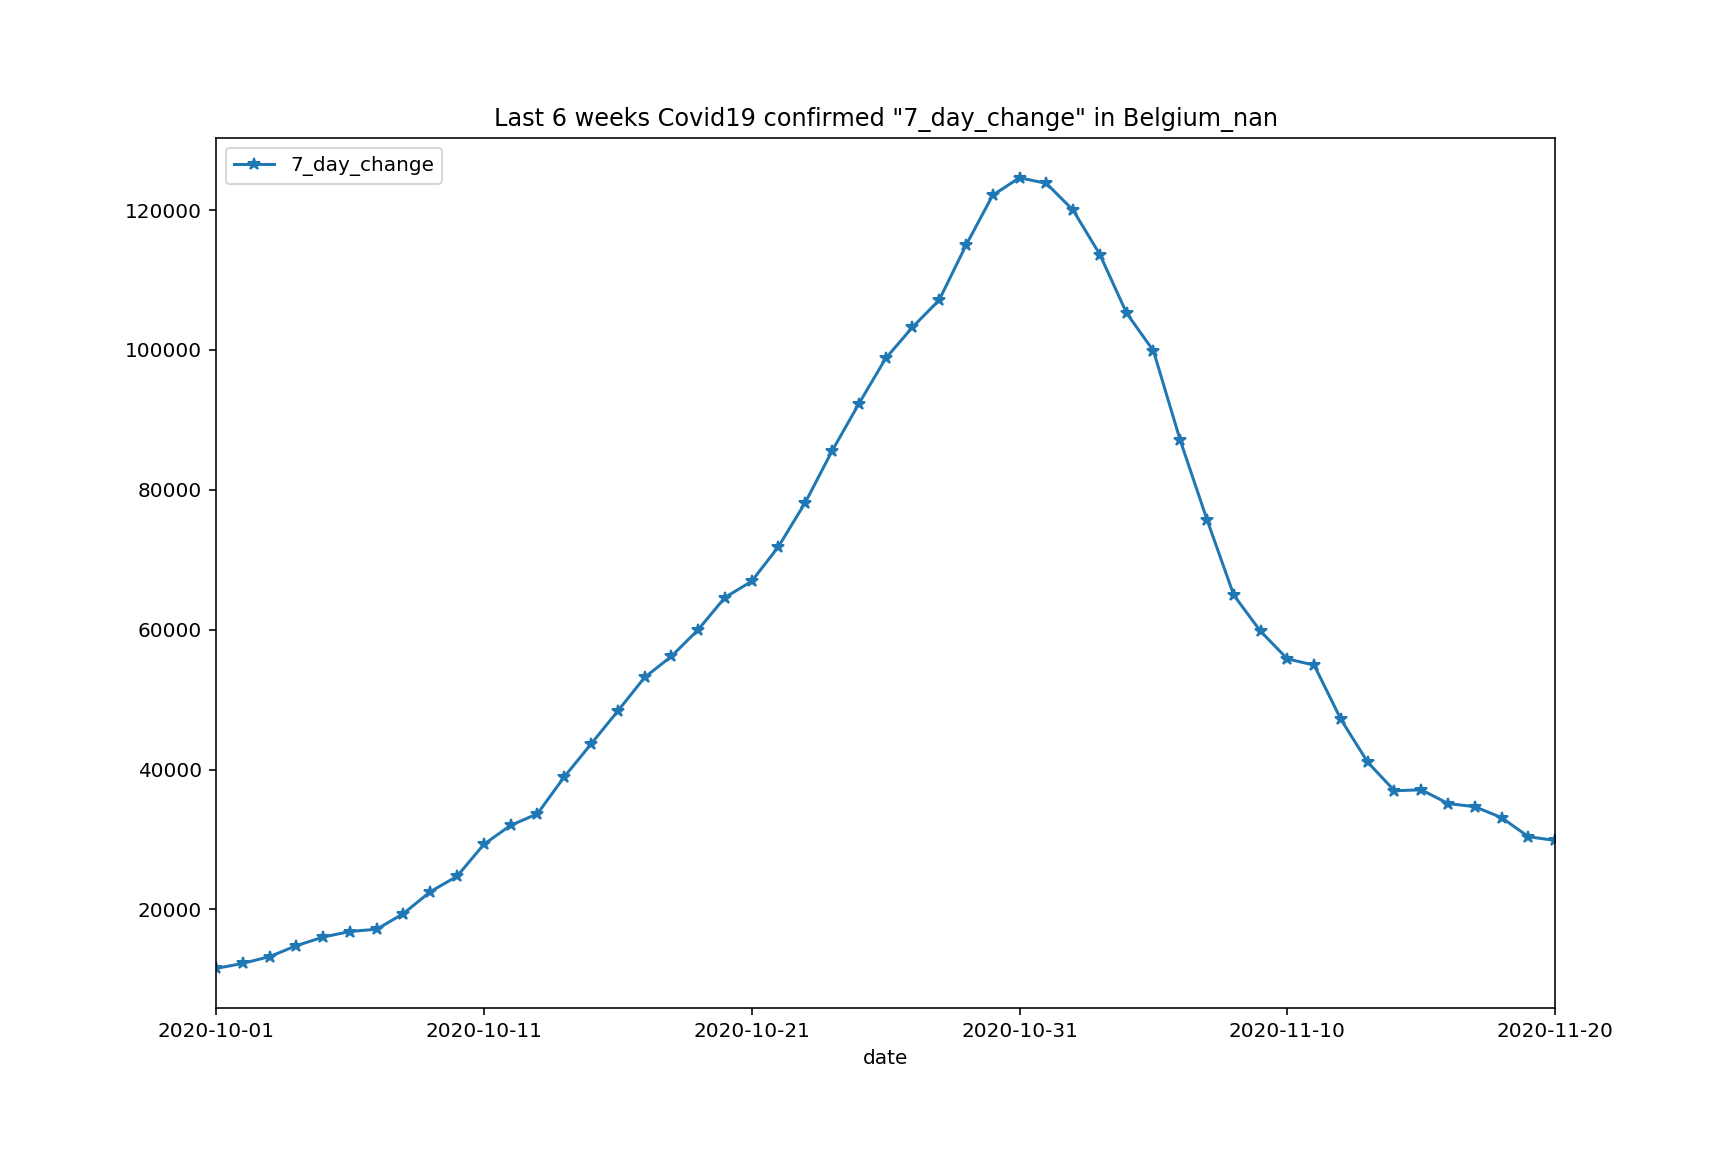

In [45]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


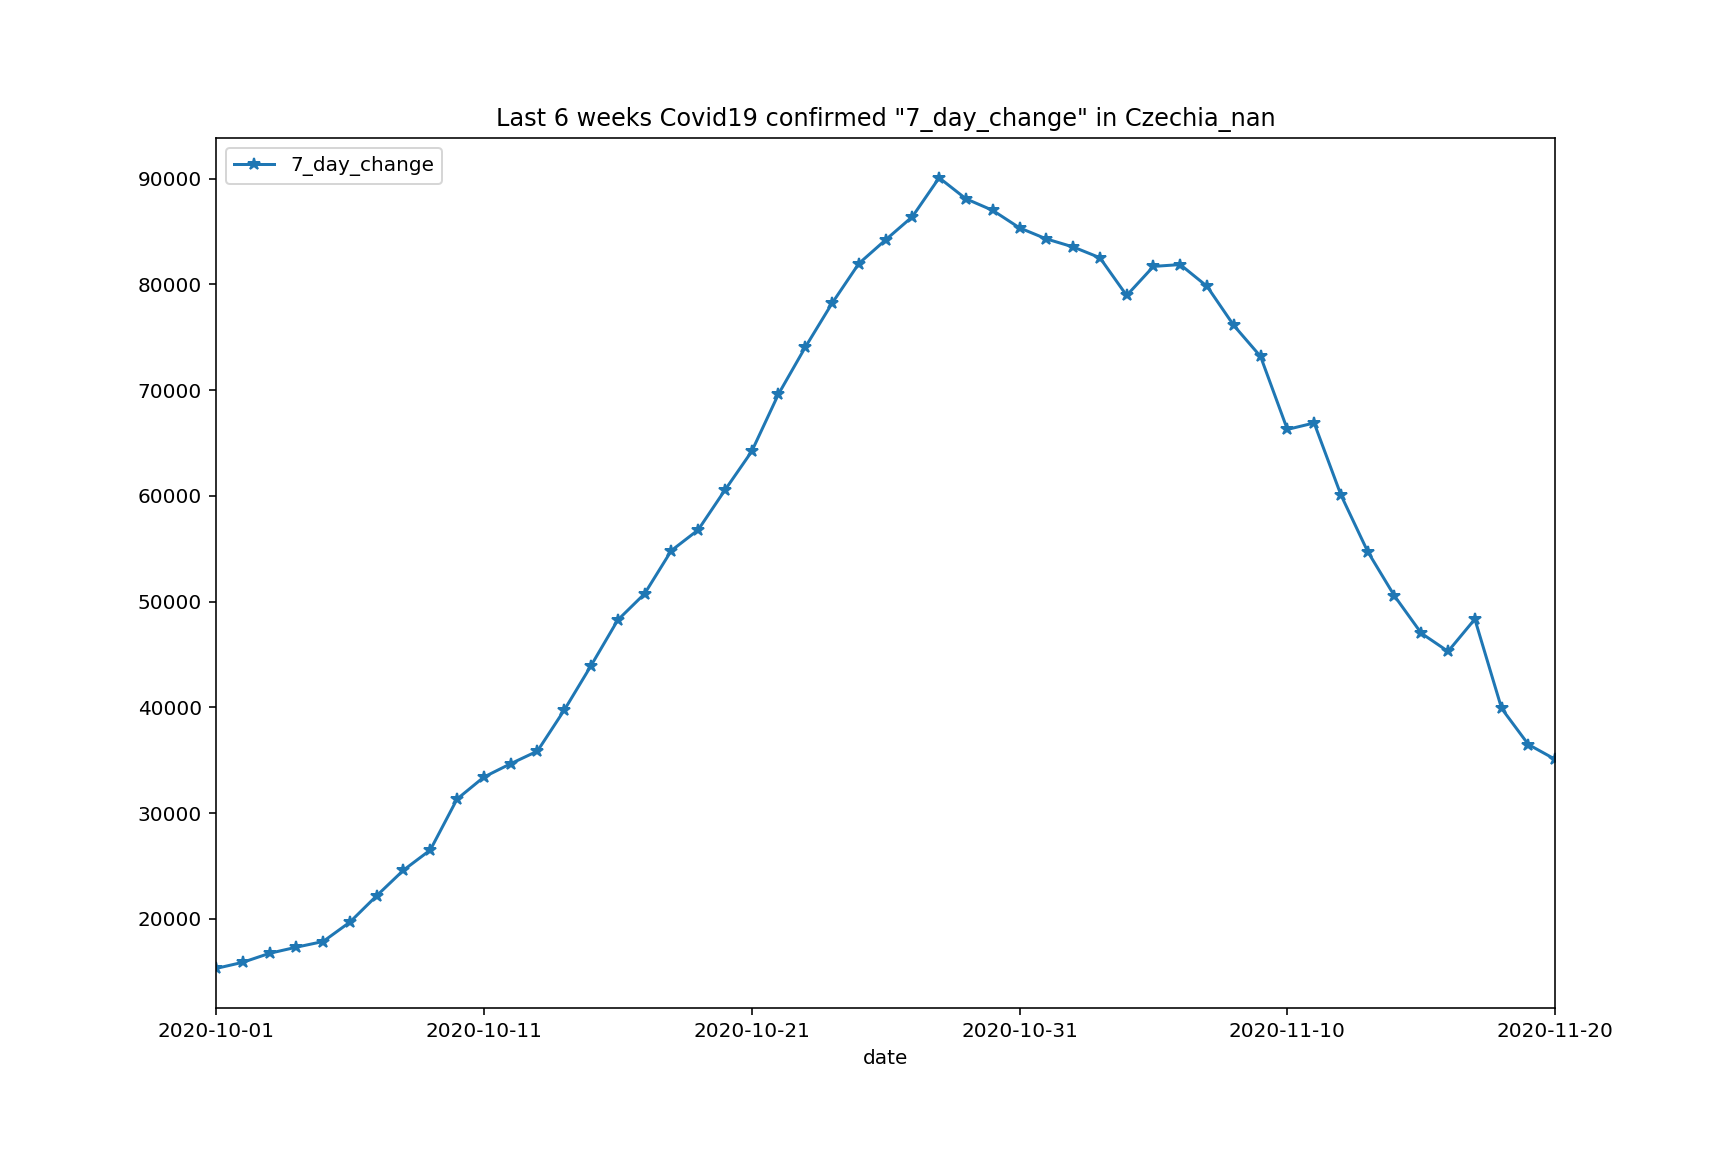

In [46]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


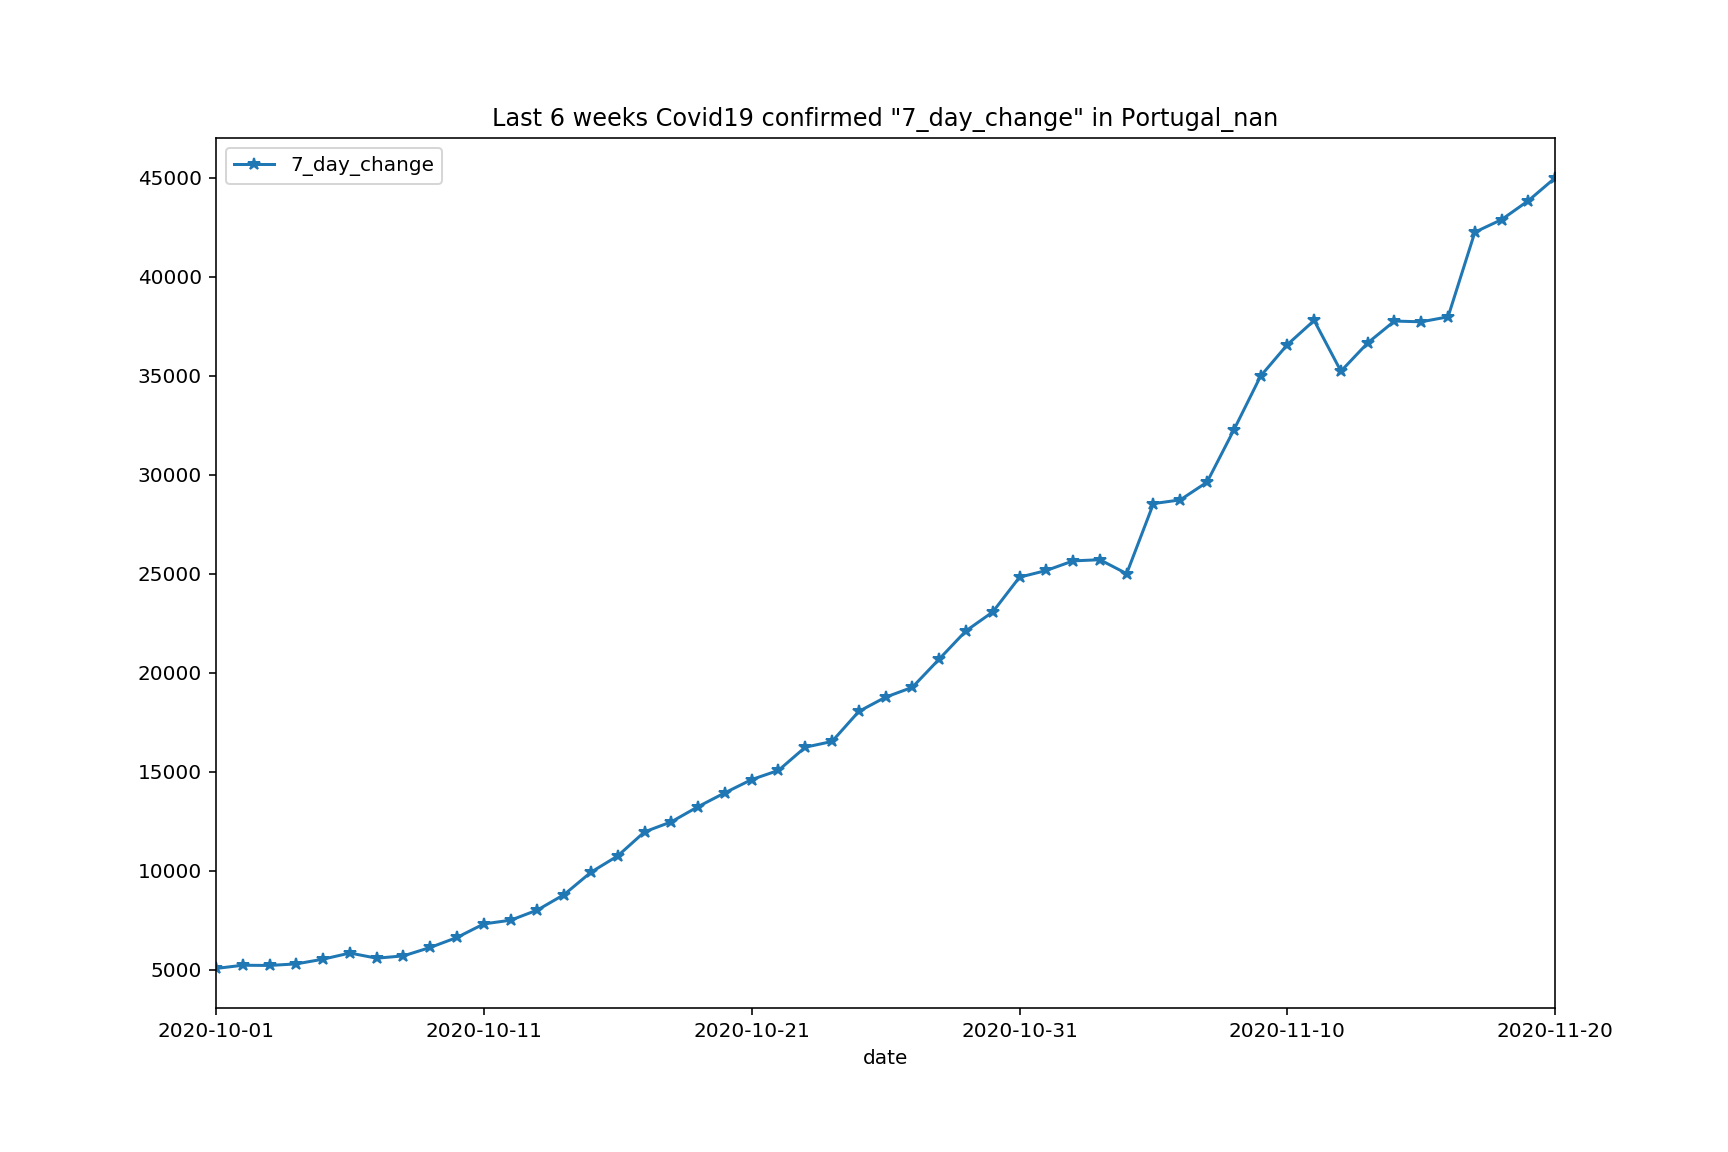

In [47]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [48]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


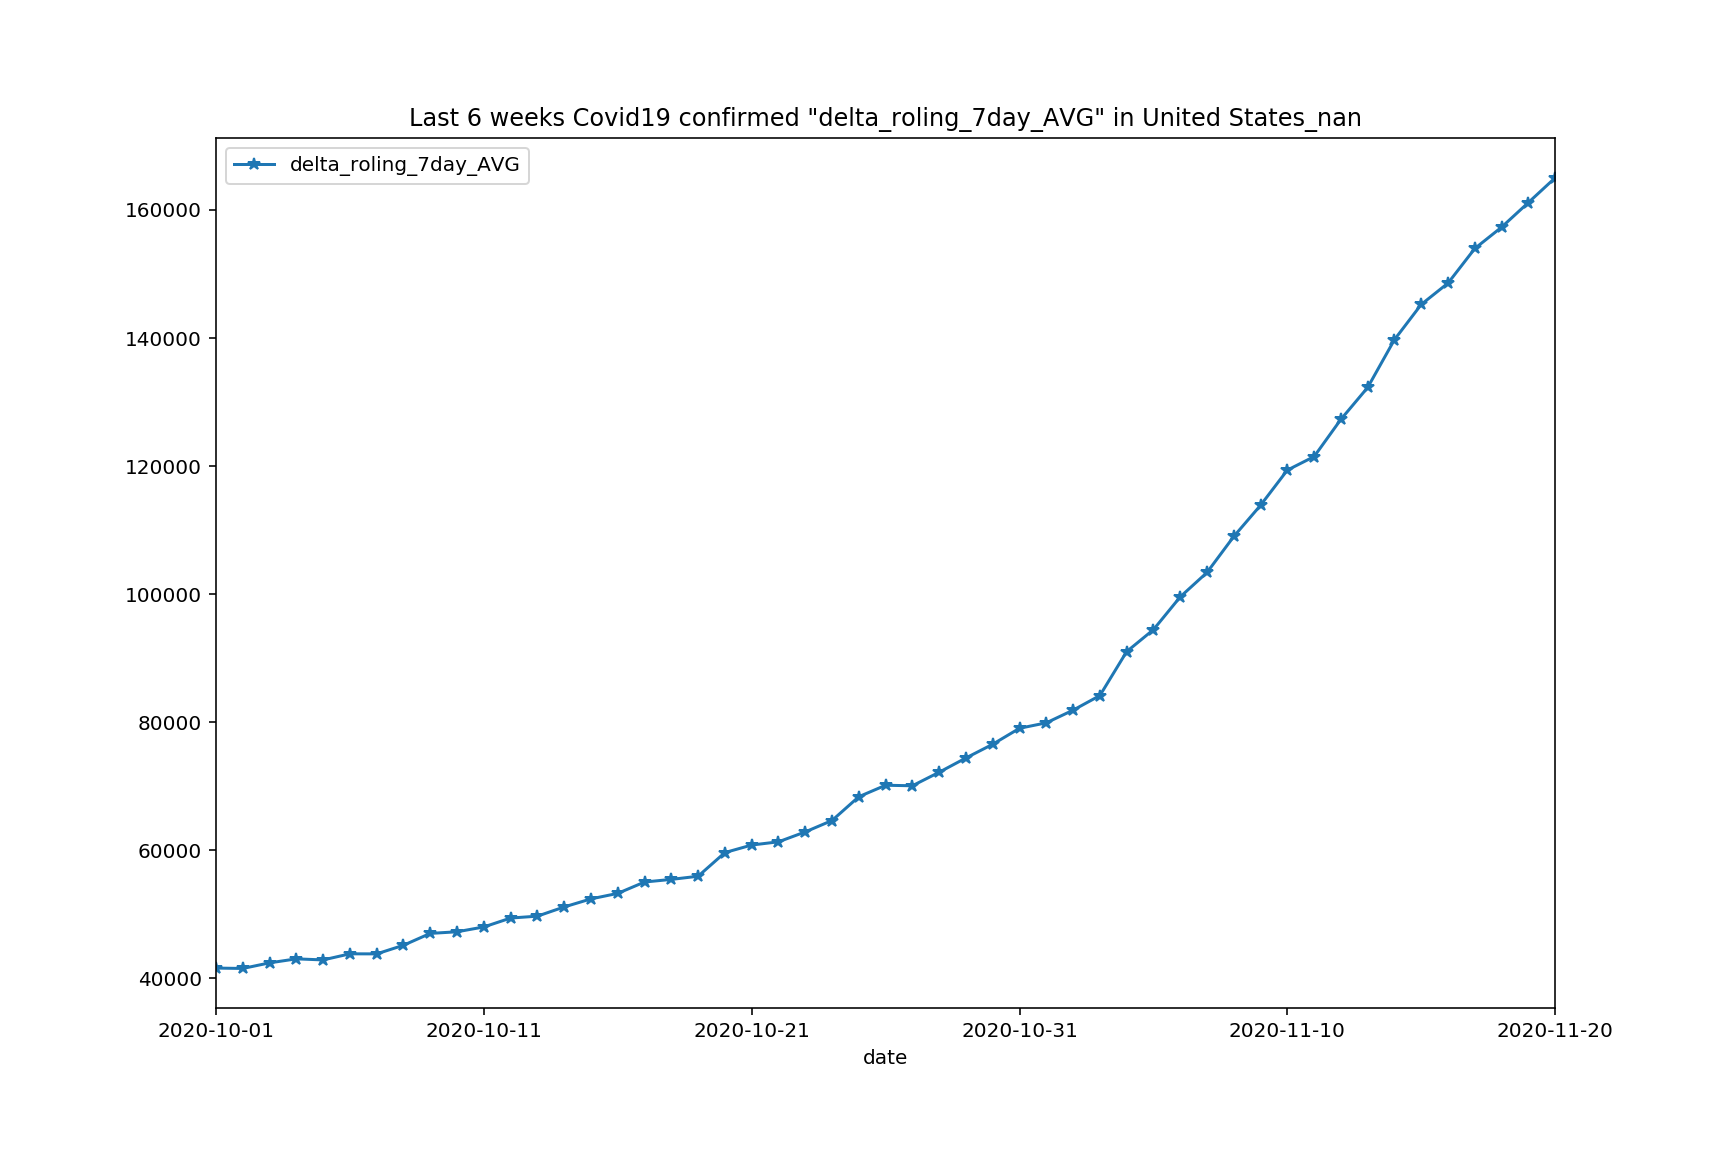

In [49]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


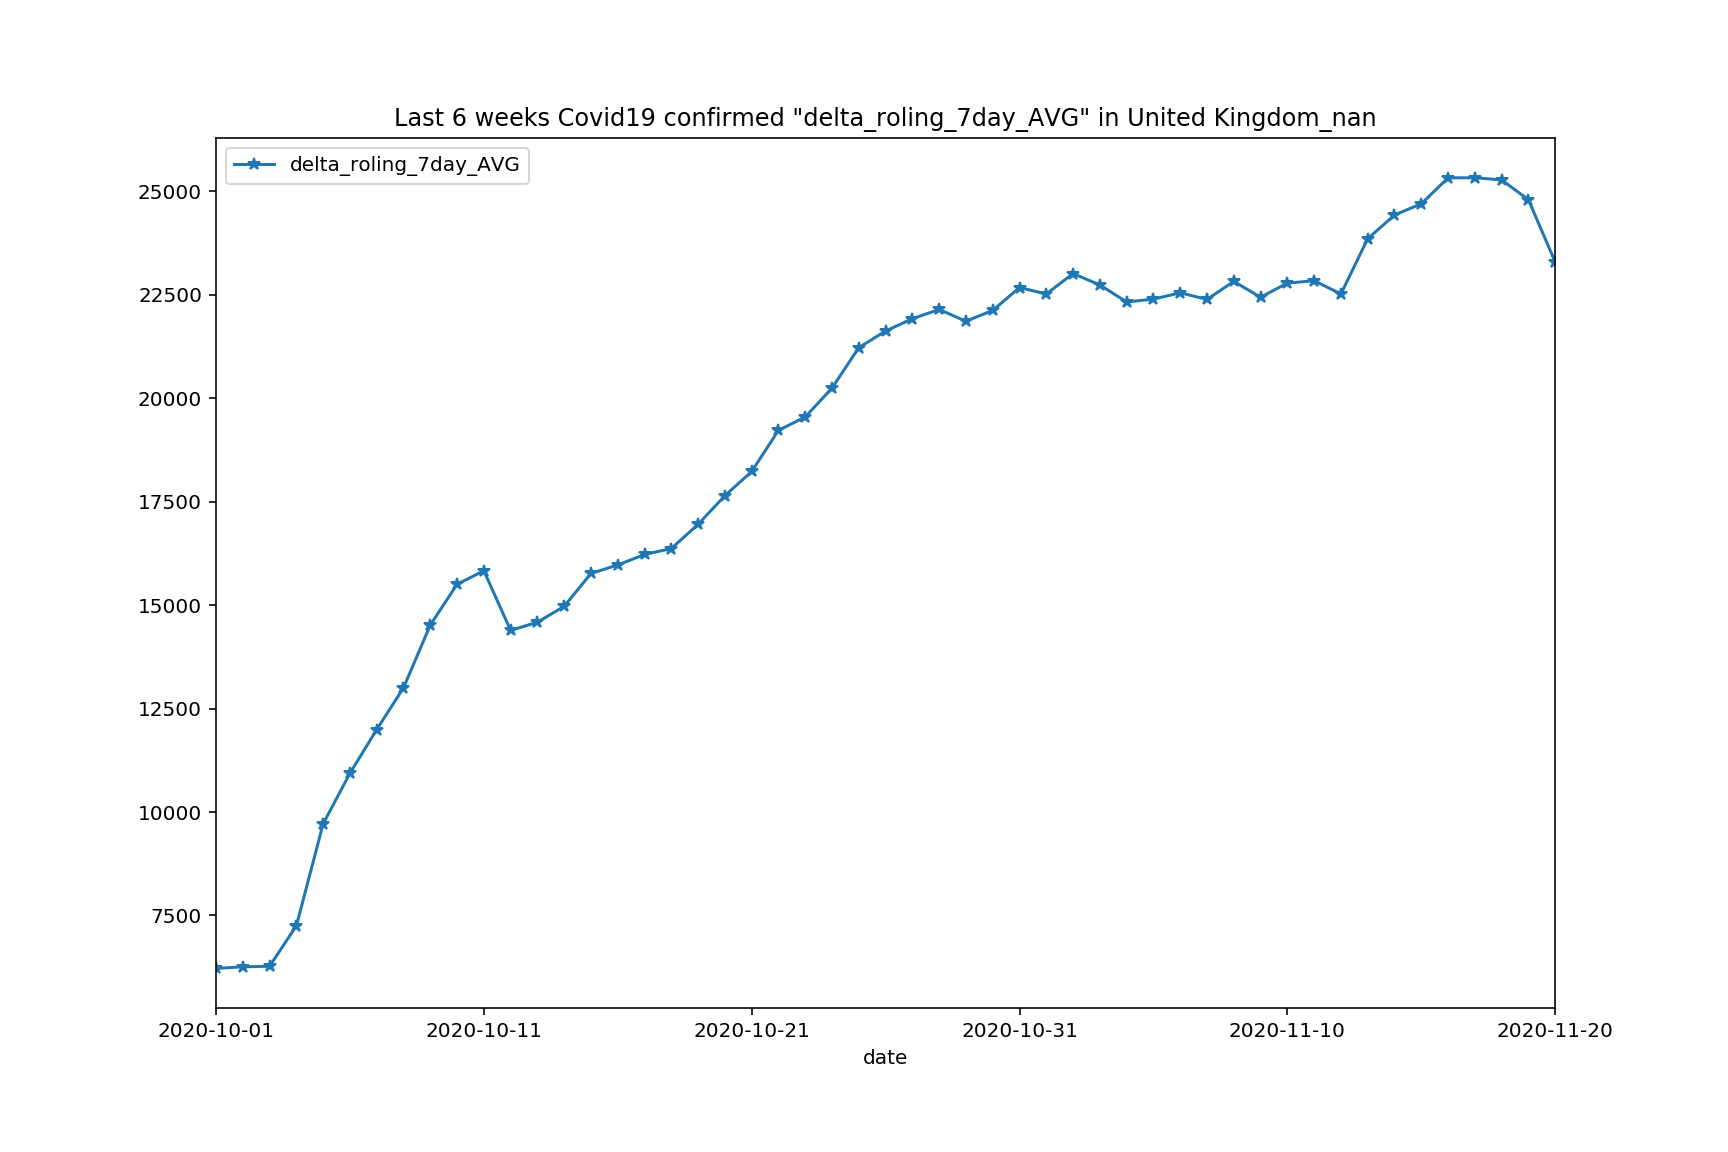

In [50]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


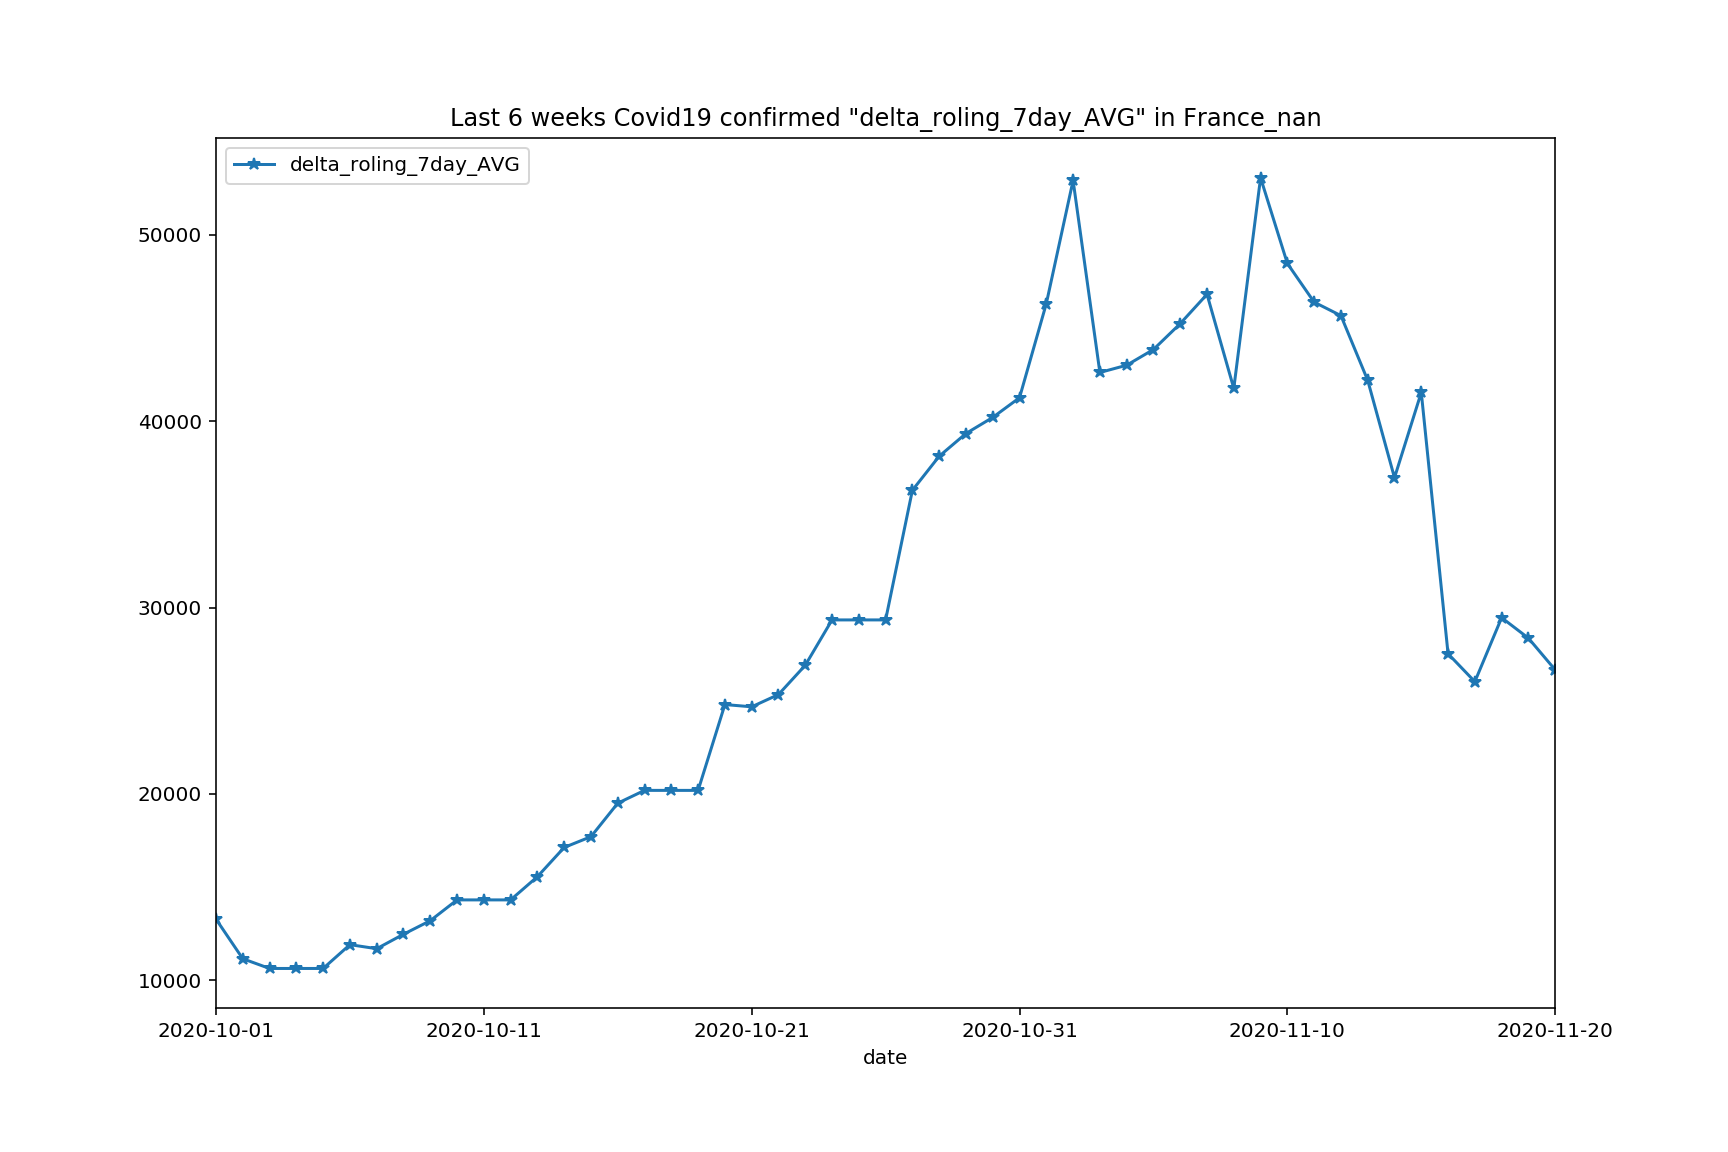

In [51]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


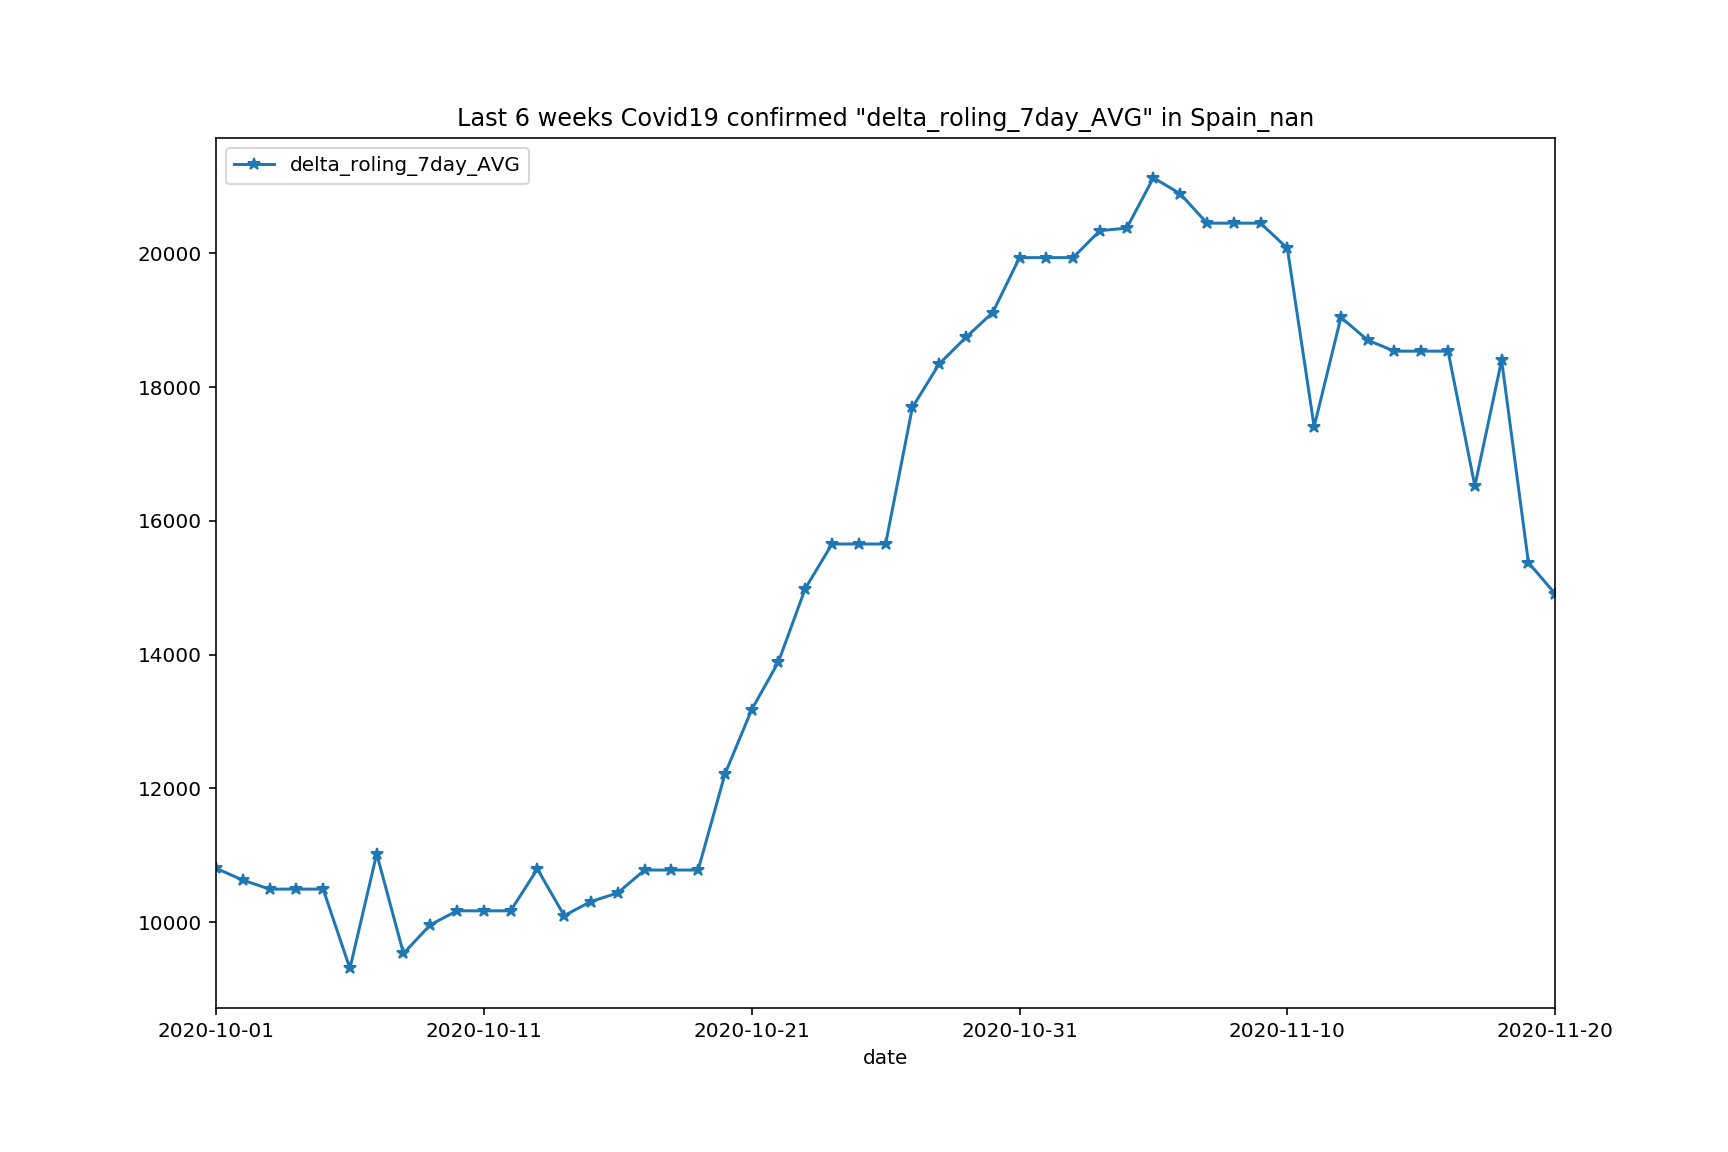

In [52]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


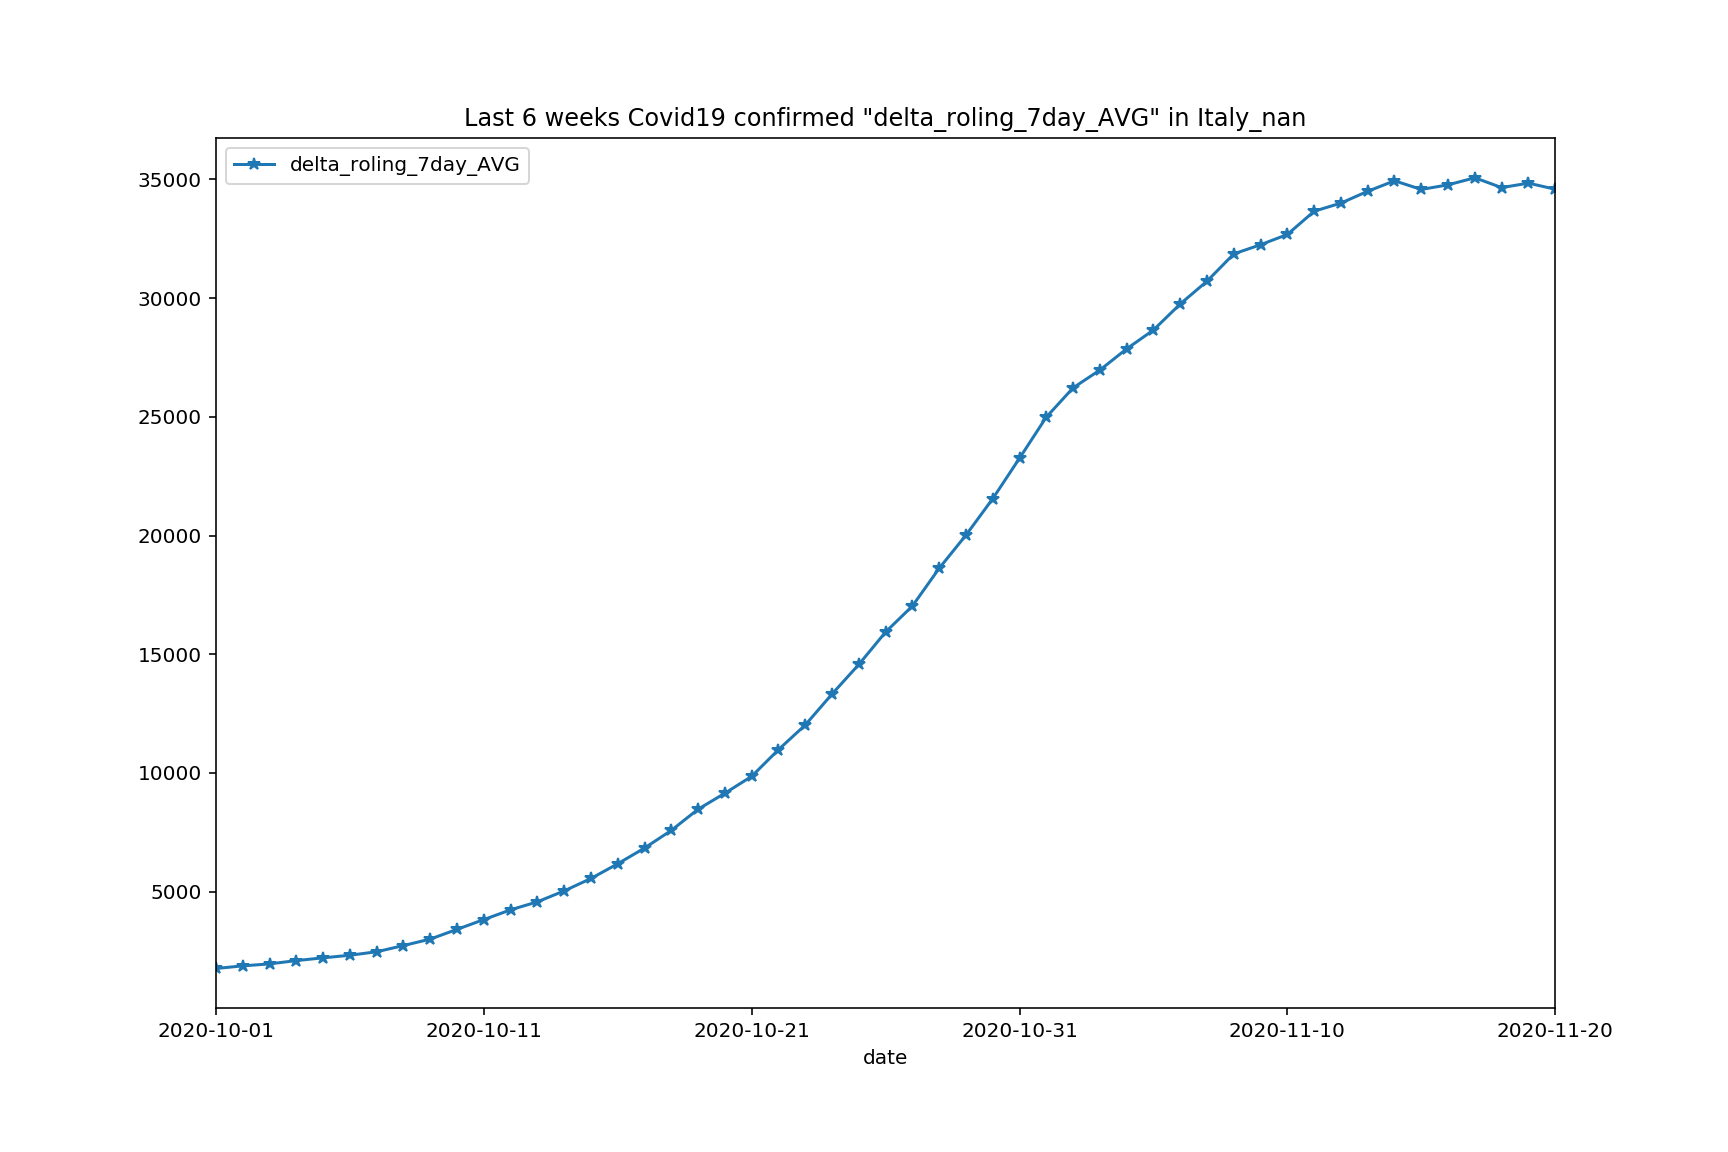

In [53]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


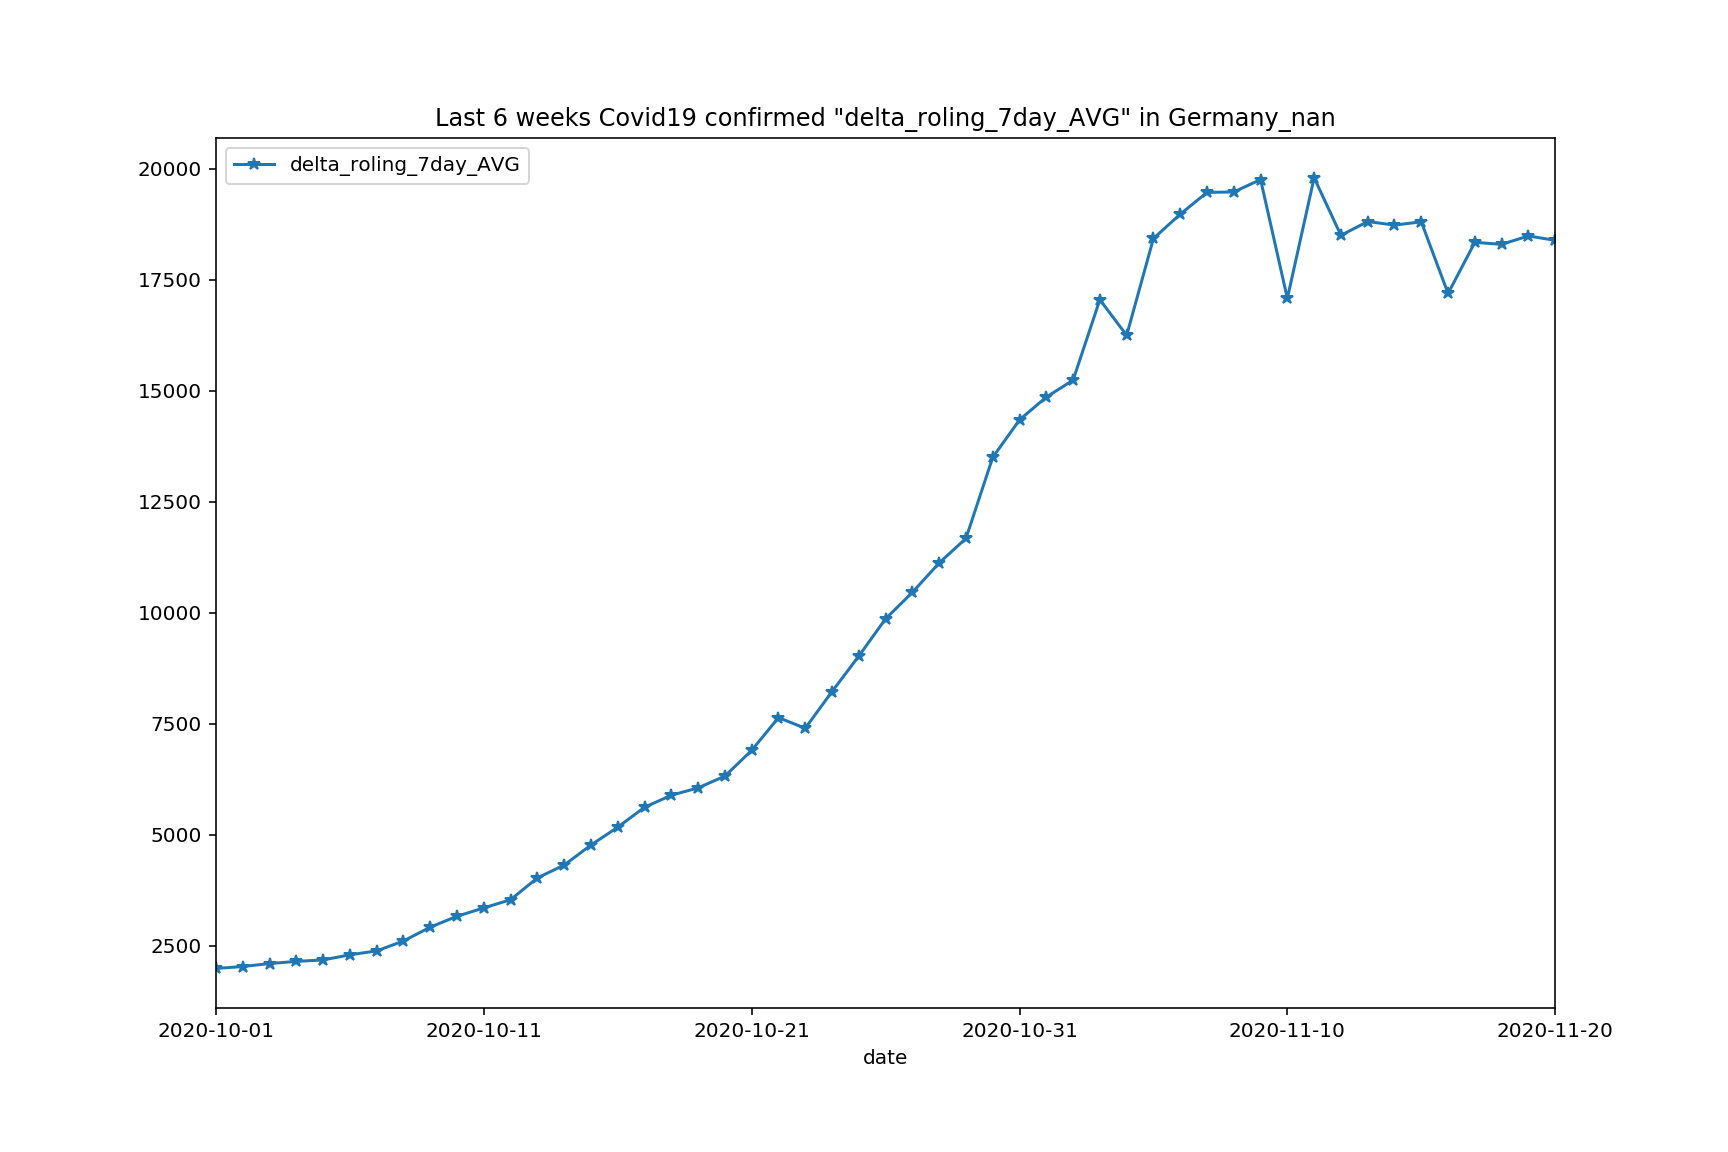

In [54]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


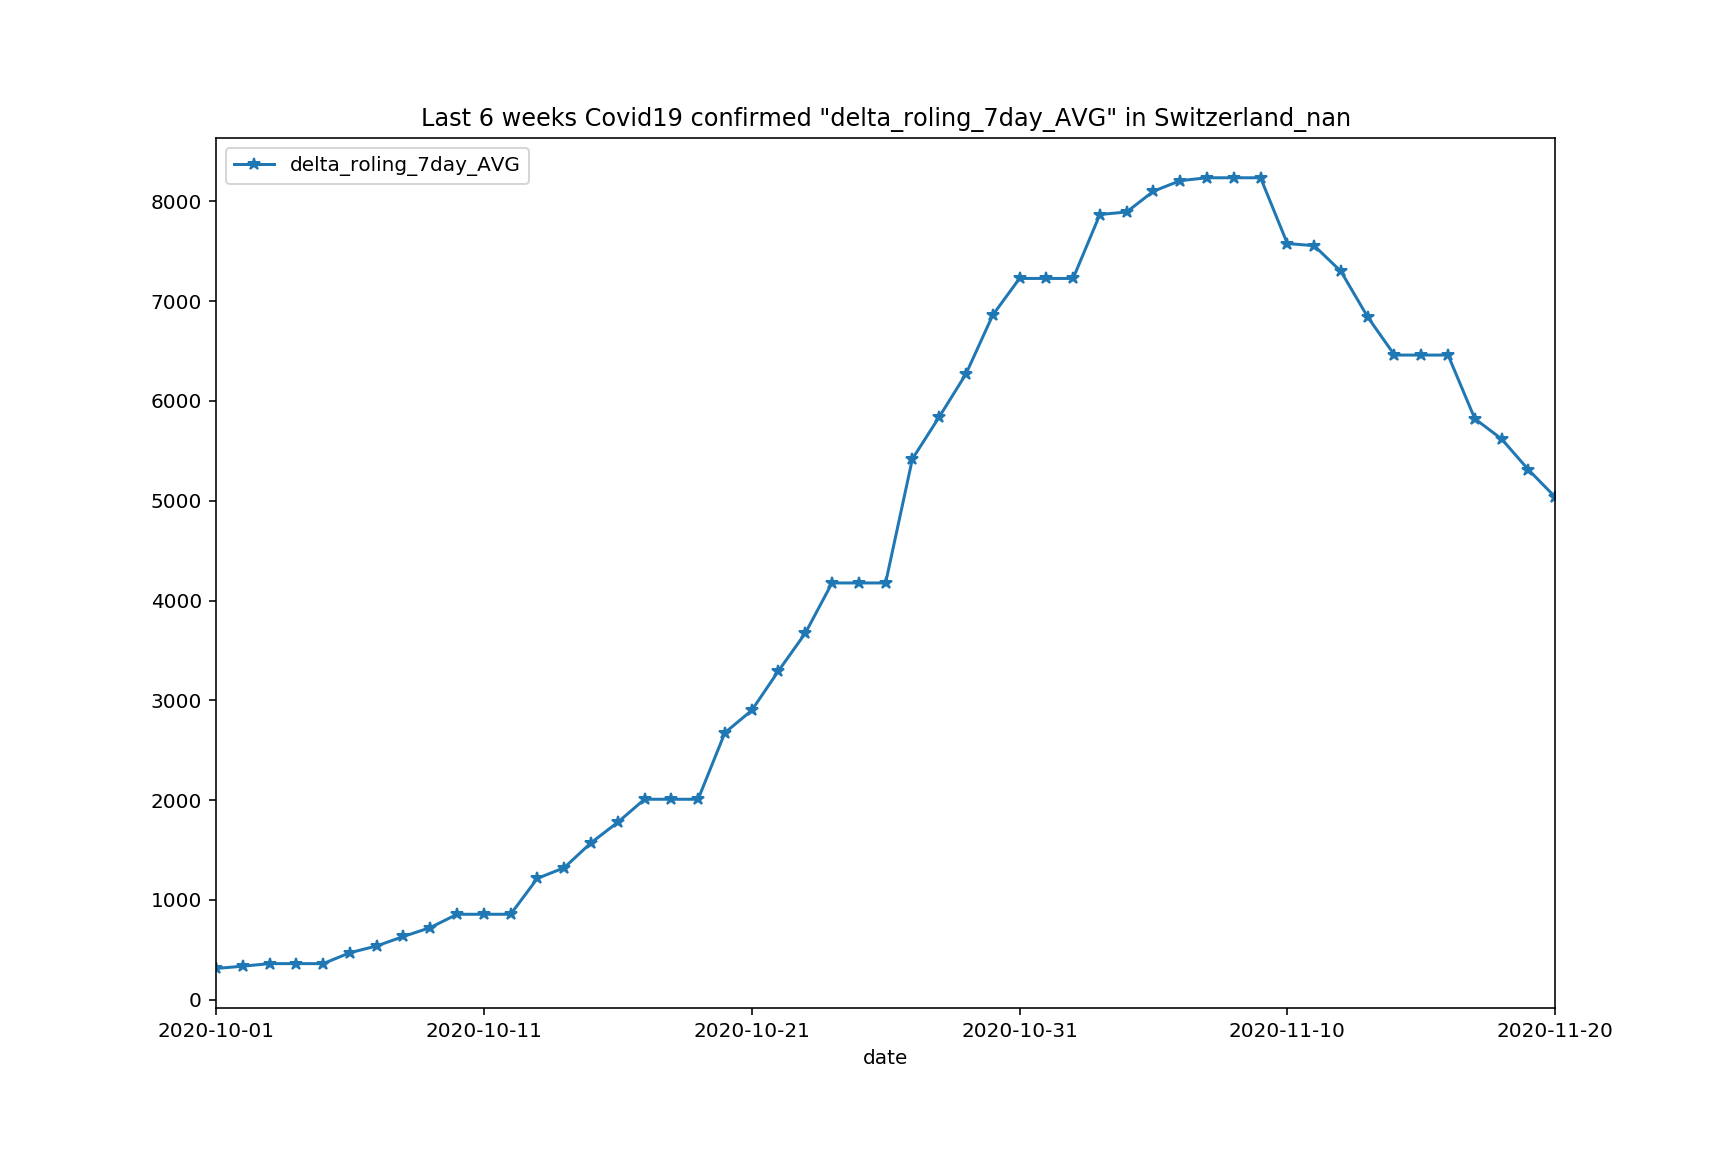

In [55]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


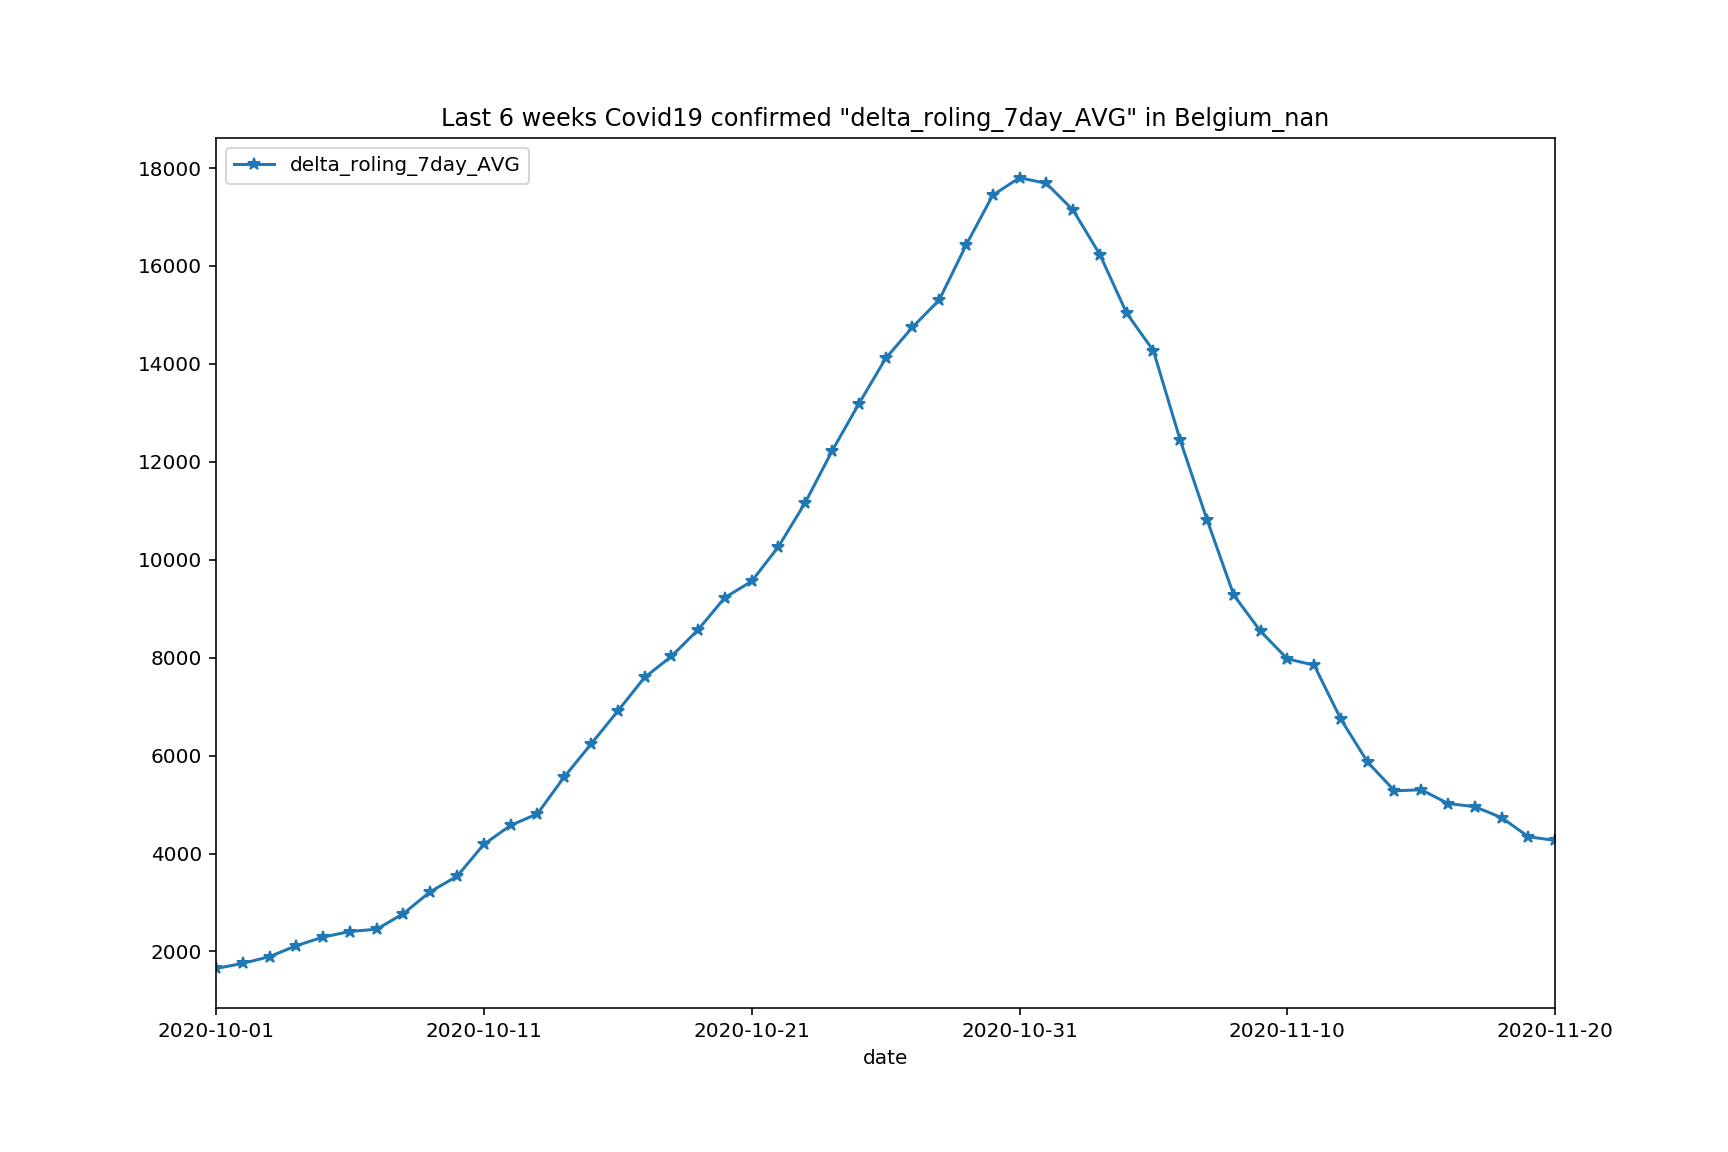

In [56]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


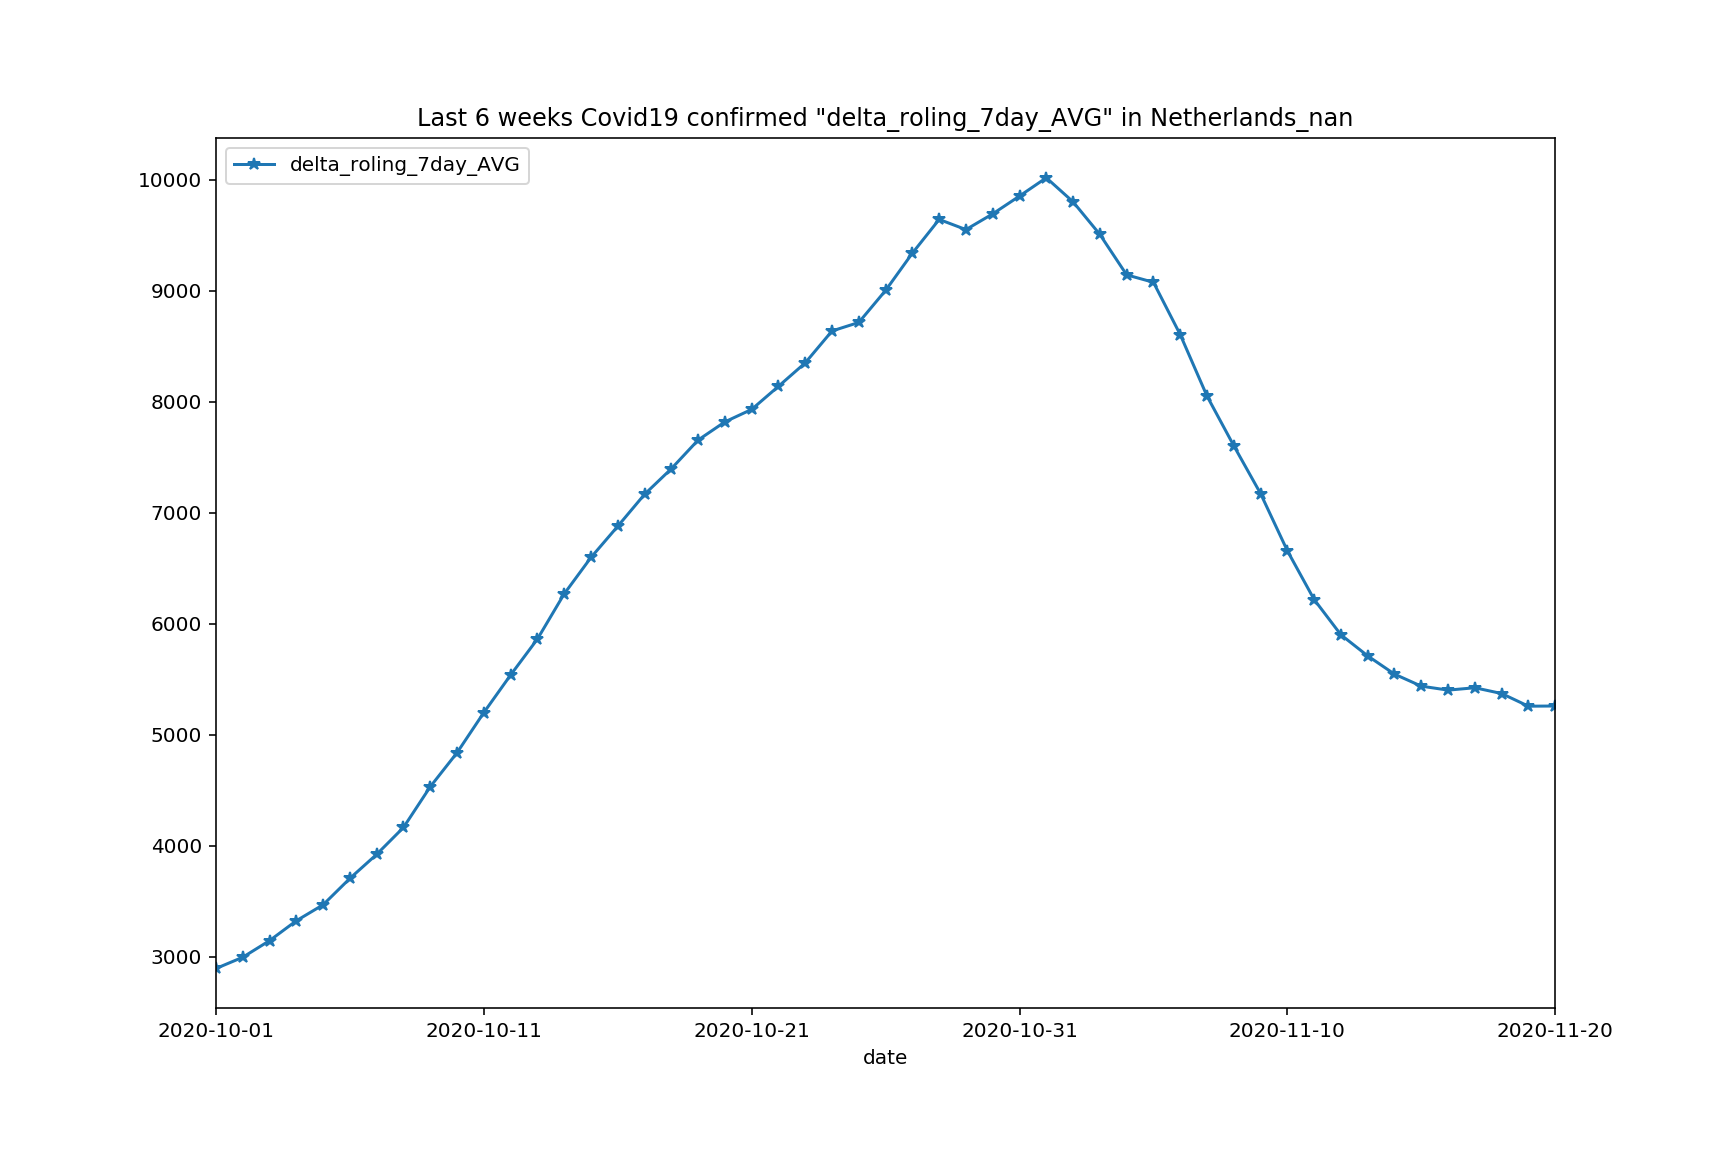

In [57]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


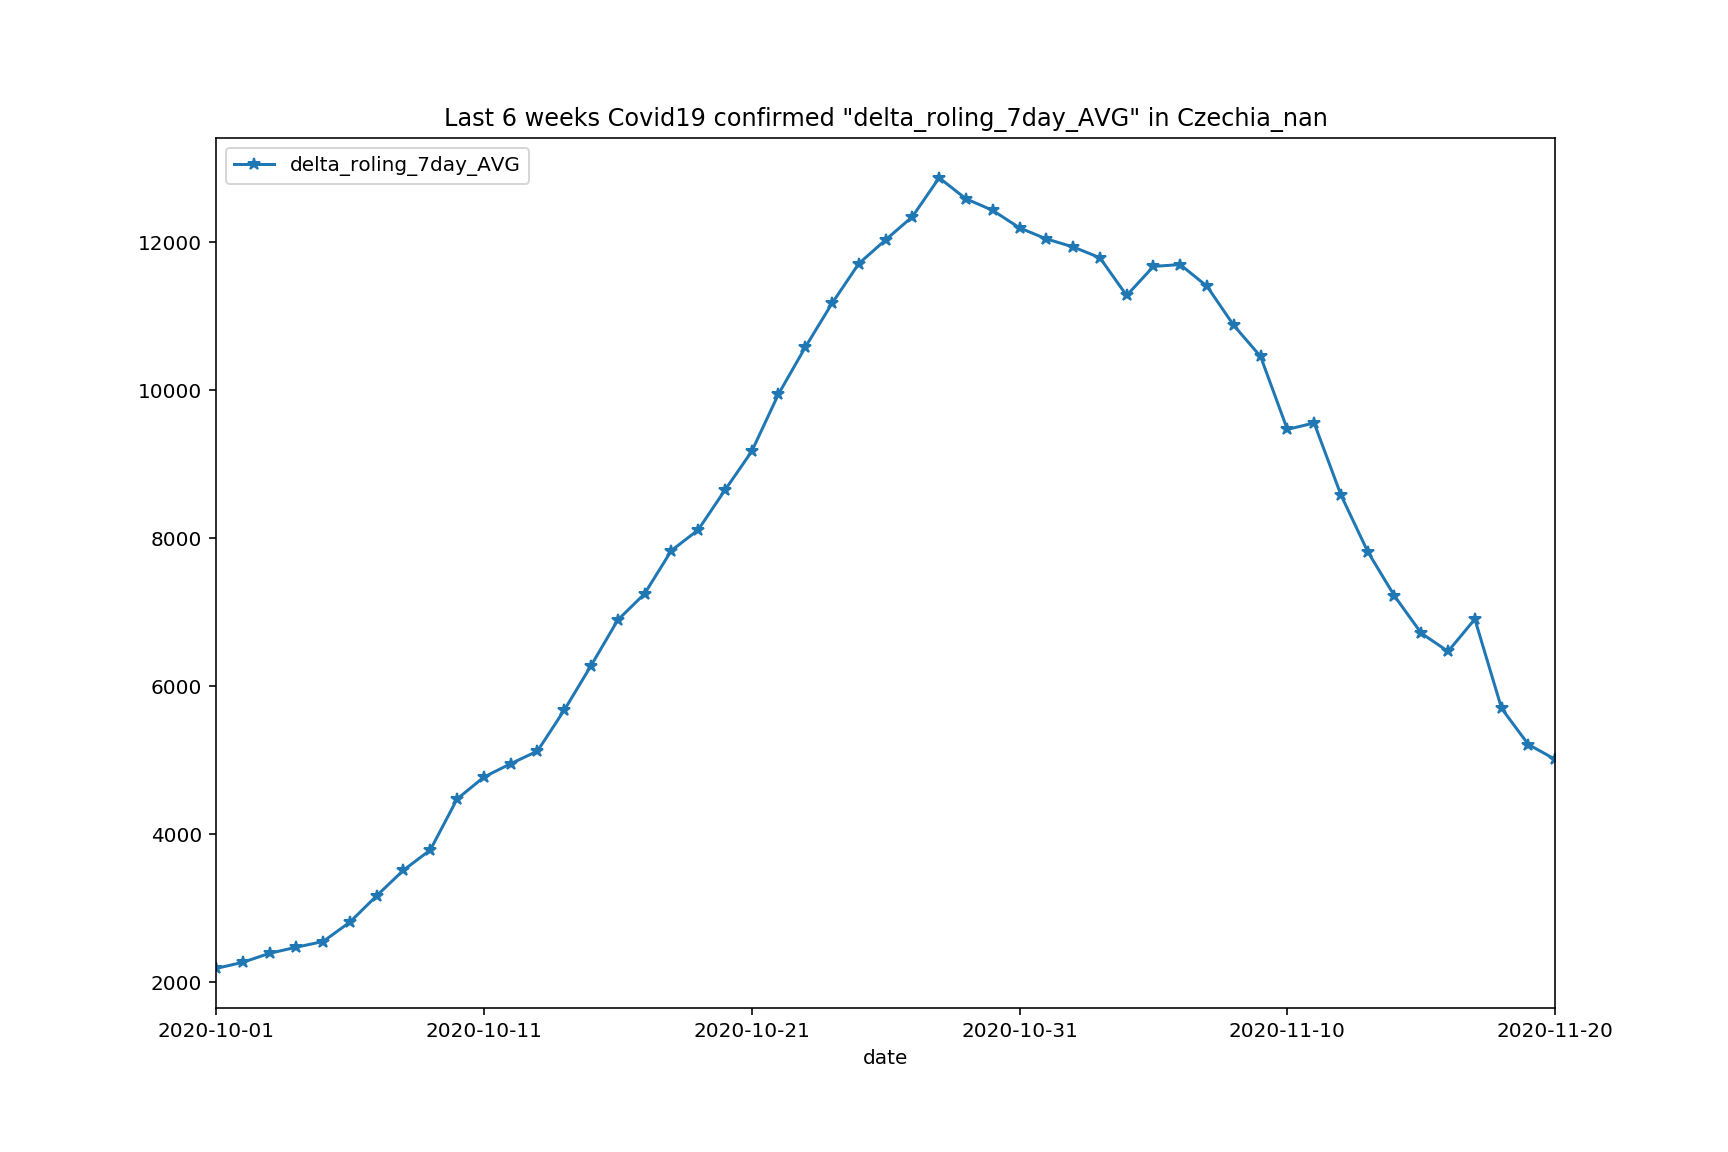

In [58]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


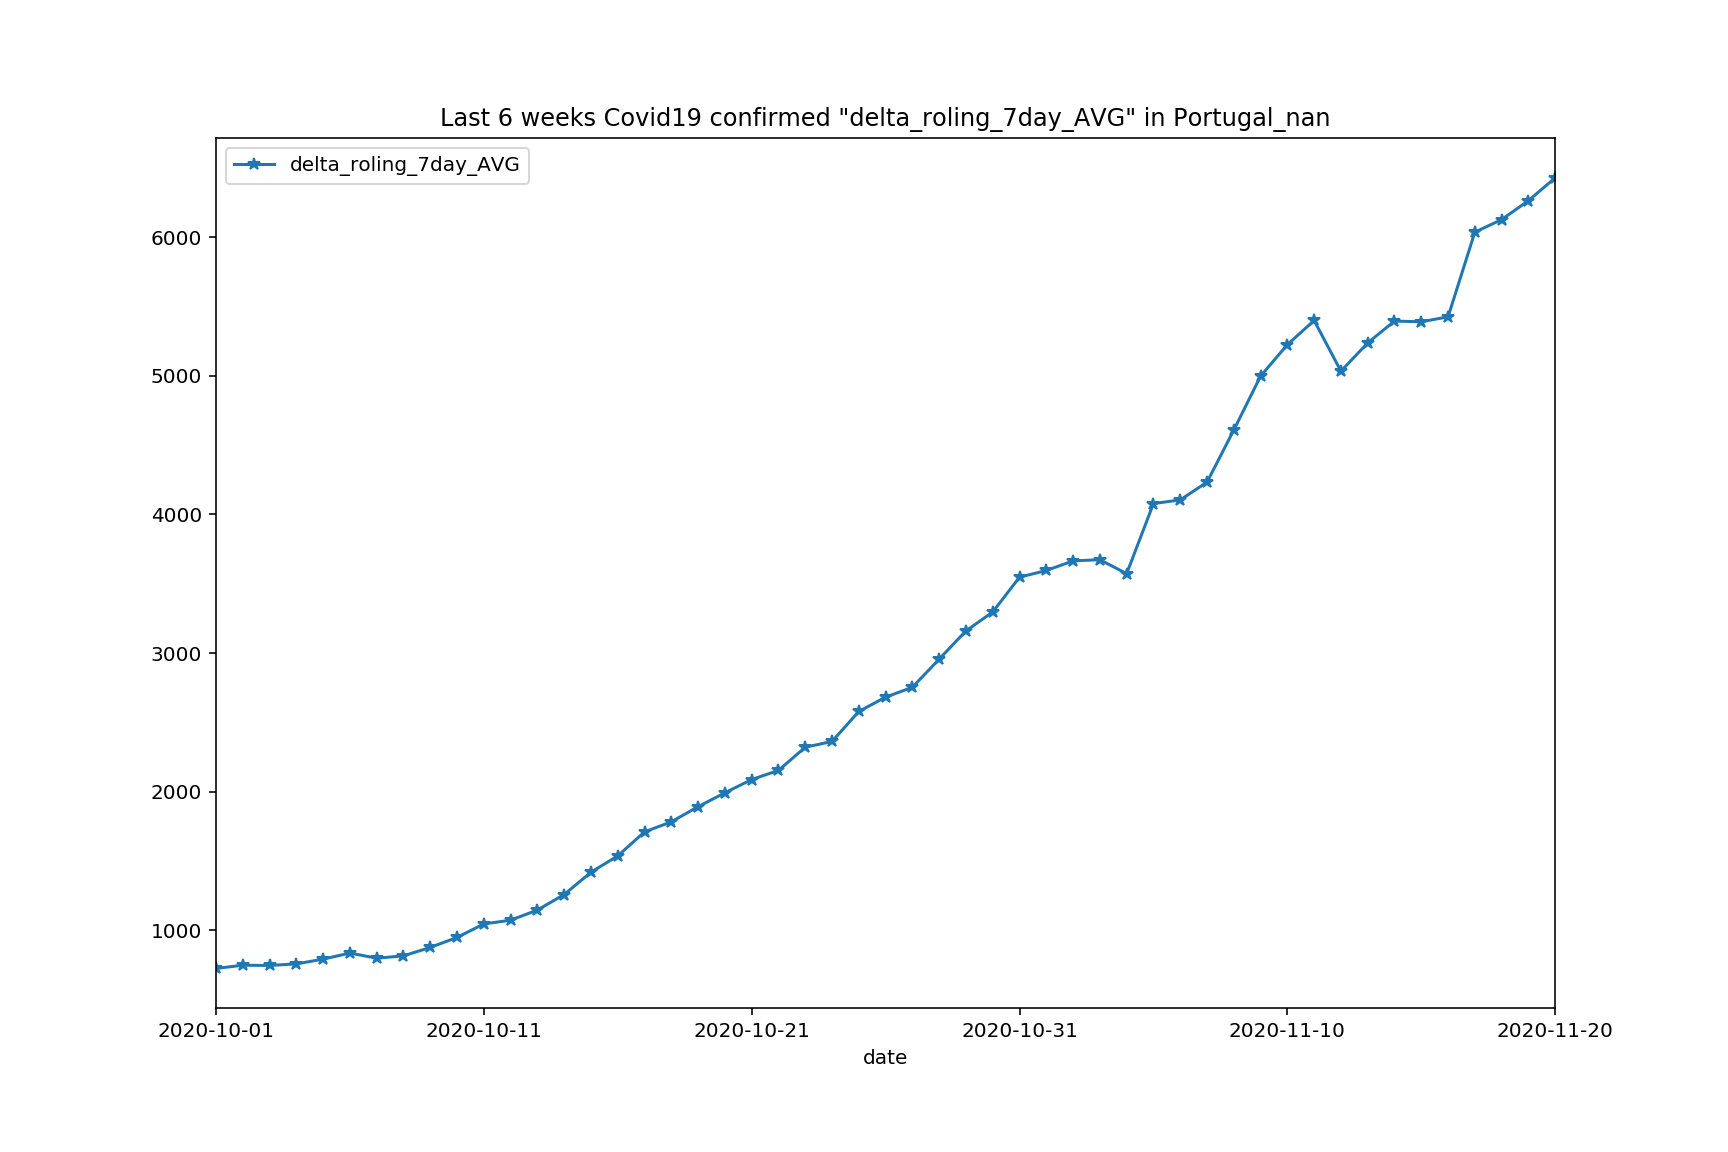

In [59]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 6 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [60]:
print("Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!")

Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!


In [61]:
exit()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
